<a id='sommaire'></a>
<h1 style='text-align:center;border:5px double;border-color:gray;'>
    <br/>
     PROJET 8<br/>
    <br/>
    <font color = 'green'>"Analyse des données de systèmes éducatifs"</font><br/>
    <br/>
</h1>



---

### Rappel du contexte :


Data Scientist dans une **start-up de la EdTech**, nommée **academy**, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

**Mark**, votre manager, vous a convié à une réunion pour vous présenter le projet d’**expansion à l’international** de l’entreprise. Il vous confie une **première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

### Mission :
`Mission communiquée par email from Mark…`


Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct dans le dossier dataset.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

---

## [Pré-analyse](#p1)
* [EdStatsCountry.csv](#1)  
* [EdStatsCountry-Series.csv](#2)  
* [EdStatsData.csv](#3) 
* [EdStatsFootNote.csv](#4) 
* [EdStatsSeries.csv](#5) 
* [Note de synthèse de la pré-analyse](#6) 


## [Analyse des données](#p2)
* [préparation de DataFrame](#7)  
* [choix des indicateurs](#8)  
* [Remplir les valeurs manquantes](#9)  


## [Visualisation](#p3)
* [Indicateur sur les ressources informatiques](#10)  
* [Indicateurs sur richesse des pays](#11)  
* [Indicateurs sur la population](#12)  
* [Indicateurs relatifs à l'éducation](#13) 
* [Visualisastion sur TABLEAU](#21)  



## [Décisions d'ouverture vers de nouveaux pays](#p4)
* [ACP](#14)  
* [Clustering k-means](#15)  
* [DataFrame dataframe modifié](#16)  
* [ACP modifié](#17)
* [Clustering k-means modifié](#18) 
* [Nos groupes sont-ils réellement distincts?](#19)
* [Recommandations des pays à clibler…](#20) 









<a id='p1'></a>


## Pré-analyse

Chargement des librairies

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
# #%pylab inline
%matplotlib inline
import plotly.express as px
#import dtale

from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition


In [2]:
pd.set_option('display.max_rows', 40)
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (12, 8),
     'axes.labelsize': 8,
     'axes.titlesize':10,
     'xtick.labelsize':10,
     'ytick.labelsize':10,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

<a id='1'></a>

<a id='1'></a>

### **`EdStatsCountry.csv`**
Informations très larges sur le contexte économique de chaque pays du Monde.

[Haut de page](#sommaire)

In [3]:
#Loading 'EdStatsCountry.csv'
country = pd.read_csv('EdStatsCountry.csv')
print(country.shape)
display(country.head(3))
display(country.info())

(241, 32)


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   
2  General Data Dissemination System (GDDS)                      1970   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  

[3 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

None

In [4]:
country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [5]:
# Dimensions du dateset
print("le jeu de données comporte {} lignes et {} colonnes.".format(country.shape[0], country.shape[1])) 

le jeu de données comporte 241 lignes et 32 colonnes.


In [6]:
#dtale.show(country)

In [7]:
#Missing values
display(country.isna().sum().sum()) #cumulative sum 
display(country.isna().sum().sort_values(ascending=True))

2354

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
WB-2 code                                              1
2-alpha code                                           3
System of National Accounts                           26
Currency Unit                                         26
Region                                                27
Income Group                                          27
Latest population census                              28
National accounts base year                           36
System of trade                                       41
SNA price valuation                                   44
Latest trade data                                     56
IMF data dissemination standard                       60
Balance of Payments Manual in use                     60
Latest water withdrawal data   

In [8]:
def missing_value_clean(data):
    '''Percentage of available (non-missing) values in the sample.'''
    sample_data_part = (data.count()/data.shape[0]*100).round(0)
    sample_data_part.sort_values(ascending=False, inplace=True)
    return sample_data_part

print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(country)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


Country Code                                         100.0
Table Name                                           100.0
Long Name                                            100.0
Short Name                                           100.0
WB-2 code                                            100.0
2-alpha code                                          99.0
Currency Unit                                         89.0
Region                                                89.0
Income Group                                          89.0
System of National Accounts                           89.0
Latest population census                              88.0
National accounts base year                           85.0
System of trade                                       83.0
SNA price valuation                                   82.0
Latest trade data                                     77.0
IMF data dissemination standard                       75.0
Balance of Payments Manual in use                     75

In [9]:
country.isna().mean().sort_values() * 100

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
WB-2 code                                              0.414938
2-alpha code                                           1.244813
System of National Accounts                           10.788382
Currency Unit                                         10.788382
Region                                                11.203320
Income Group                                          11.203320
Latest population census                              11.618257
National accounts base year                           14.937759
System of trade                                       17.012448
SNA price valuation                                   18.257261
Latest trade data                                     23.236515
IMF data dissemination standard         

La plupart des variables ne sont pas exploitables, mais ne semblent pas importantes dans le contexte de l'analyse.

In [10]:
country.duplicated('Country Code', keep='first').sum()

0

In [11]:
display(country['Country Code'].nunique())
display(country['Country Code'].unique())

241

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI',
       'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY',
       'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA',
       'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC',
       'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC',
       'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE',
       'LKA', 'LMC',

In [12]:
display(country['Short Name'].nunique())
display(country['Short Name'].unique())

241

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


In [13]:
display(country['Region'].nunique())
display(country['Region'].unique())

7

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Il peut-être pertinent, suivant les questions posées, de procéder non pas par pays, mais par continent ou groupement de pays.

In [14]:
#Counting countries / World Region
country.groupby('Region')['Country Code'].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Country Code, dtype: int64

In [15]:
country_group = country.groupby('Region')[['Country Code']].count().sort_values(by='Country Code',ascending=True)
country_group

Country Code
Region                                  
North America                          3
South Asia                             8
Middle East & North Africa            21
East Asia & Pacific                   36
Latin America & Caribbean             41
Sub-Saharan Africa                    48
Europe & Central Asia                 57

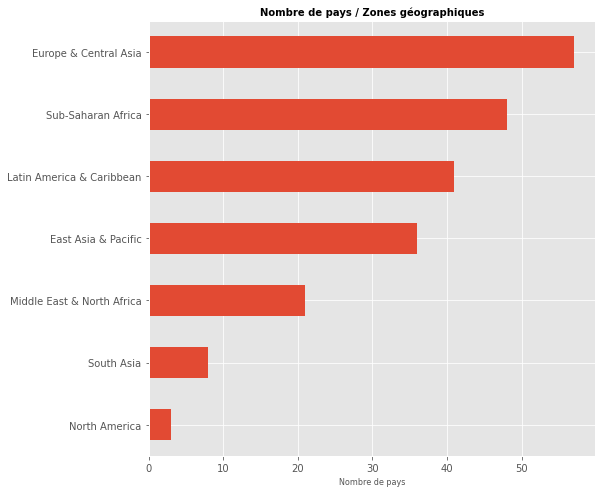

In [16]:
# Paramètres généraux
plt.figure(figsize=(8,8))

# Paramètres graphiques
country.groupby('Region')['Country Code'].count().sort_values(ascending=True).plot(kind='barh')

# Métadonnées
plt.title('Nombre de pays / Zones géographiques')
plt.xlabel('Nombre de pays')
plt.ylabel('')

plt.show()

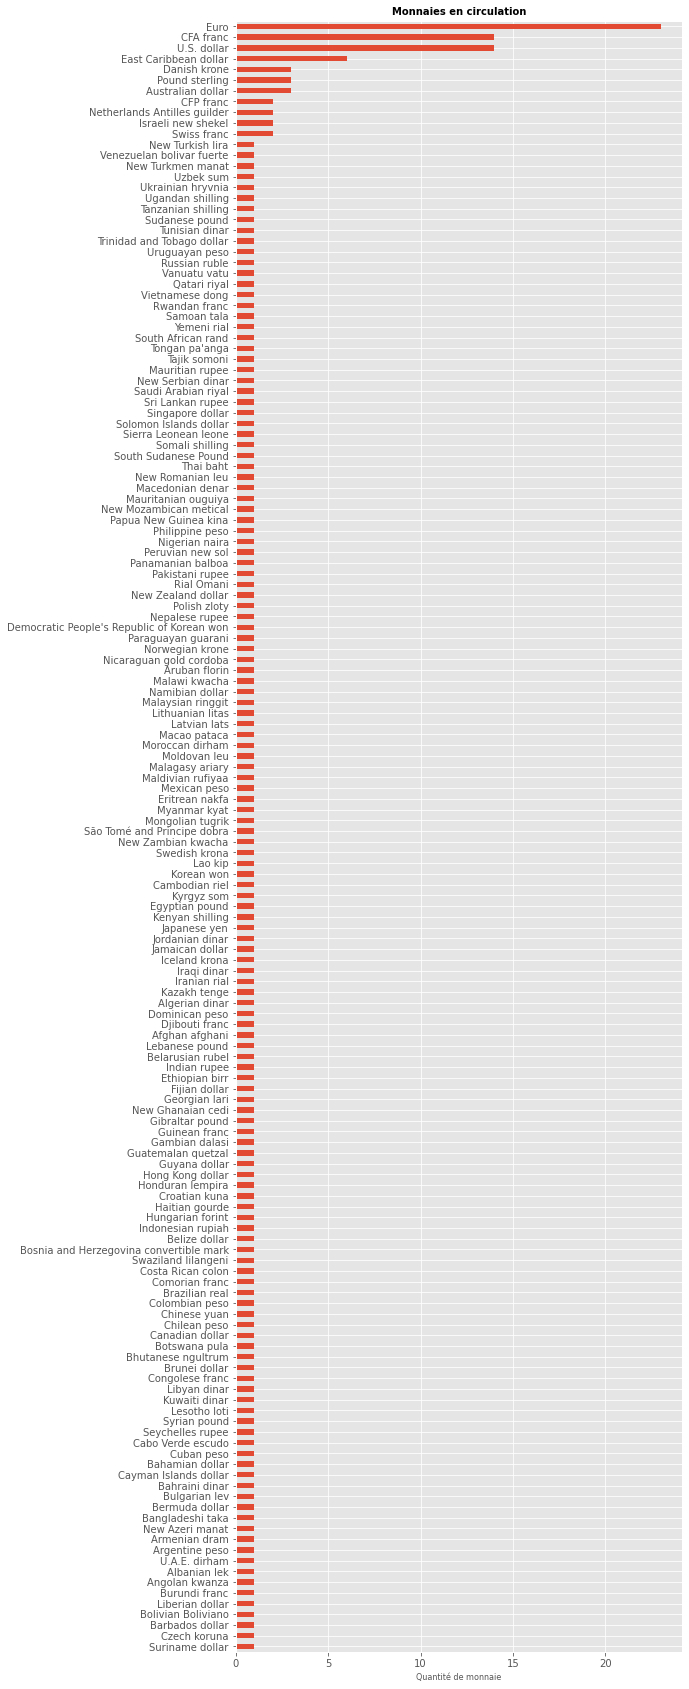

In [17]:
# Paramètres généraux
plt.figure(figsize=(8,30))

# Paramètres graphiques
country['Currency Unit'].value_counts().sort_values(ascending=True).plot(kind='barh')

# Métadonnées
plt.title('Monnaies en circulation')
plt.xlabel('Quantité de monnaie')
plt.ylabel('')

plt.show()

Aruban florin     1
Afghan afghani    1
Angolan kwanza    1
Albanian lek      1
Euro              1
U.A.E. dirham     1
Argentine peso    1
Armenian dram     1
U.S. dollar       1
Name: Currency Unit, dtype: int64


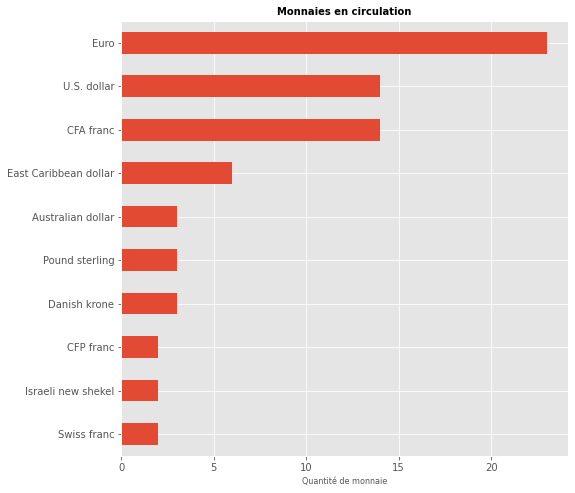

In [18]:
# Paramètres généraux
plt.figure(figsize=(8,8))

# Paramètres graphiques
country['Currency Unit'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')

# Métadonnées
plt.title('Monnaies en circulation')
plt.xlabel('Quantité de monnaie')
plt.ylabel('')

print(country['Currency Unit'][:10].value_counts())
plt.show()

In [19]:
country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [20]:
#Classification of high income countries
country[country['Income Group']
        .isin(['High income: nonOECD', 'High income: OECD'])][['Country Code', 'Short Name']]

Country Code                Short Name
0            ABW                     Aruba
4            AND                   Andorra
6            ARE      United Arab Emirates
10           ATG       Antigua and Barbuda
11           AUS                 Australia
..           ...                       ...
210          TCA  Turks and Caicos Islands
218          TTO       Trinidad and Tobago
226          URY                   Uruguay
227          USA             United States
231          VIR            Virgin Islands

[75 rows x 2 columns]

Notons que l'échantillon peut-être utilisé indirectement dans la résolution de notre problématique. En effet, les données pourront être exploitées, si nécessaire, pour obtenir **une vision géoéconomique** des pays, sans pour autant exprimer le contexte métier de l'éducation online.

<a id='2'></a>

<a id='2'></a>

### **`EdStatsCountry-Series.csv`**
Informations descriptives sur les sources des données du dataframe 'country'.

[Haut de page](#sommaire)

In [21]:
#Loading 'EdStatsCountry-Series.csv'
countrySeries = pd.read_csv('EdStatsCountry-Series.csv')
display(countrySeries.shape)
display(countrySeries.isna().sum())
countrySeries.head(3)

(613, 4)

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   
2         AFG  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN

In [22]:
# Dimensions du dateset
print("le jeu de données comporte {} lignes et {} colonnes.".format(countrySeries.shape[0], countrySeries.shape[1])) 

le jeu de données comporte 613 lignes et 4 colonnes.


In [23]:
#dtale.show(countrySeries)

In [24]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(countrySeries)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


CountryCode    100.0
SeriesCode     100.0
DESCRIPTION    100.0
Unnamed: 3       0.0
dtype: float64

In [25]:
countrySeries.duplicated(subset=['CountryCode', 'SeriesCode']).sum()

0

In [26]:
display(countrySeries['CountryCode'].nunique())
display(countrySeries['CountryCode'].unique())

211

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN',
       'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN',
       'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD',
       'MLI', 'MLT',

Notons 211 pays VS 241 pays dans le dataframe 'country'. Peu d'importance dans le contexte de l'analyse…

In [27]:
#Check missing countries in relation to the 'country' dataframe
country[~country['Country Code'].isin(countrySeries['CountryCode'].unique())][['Short Name']]

Short Name
5                                        Arab World
47                                          Curaçao
57            East Asia & Pacific (developing only)
58          East Asia & Pacific (all income levels)
59          Europe & Central Asia (developing only)
60        Europe & Central Asia (all income levels)
63                                        Euro area
68                                   European Union
89                                      High income
92           Heavily indebted poor countries (HIPC)
116     Latin America & Caribbean (developing only)
122   Latin America & Caribbean (all income levels)
123    Least developed countries: UN classification
124                                      Low income
127                             Lower middle income
128                             Low & middle income
134                        St. Martin (French part)
140  Middle East & North Africa (all income levels)
143                                   Middle income
148    Middle East & North Africa (developing only)
157                                   North America
166                                           Nauru
168                                    OECD members
187                                      South Asia
198            Sub-Saharan Africa (developing only)
199                                     South Sudan
200          Sub-Saharan Africa (all income levels)
207                       Sint Maarten (Dutch part)
225                             Upper middle income
234                                           World

In [28]:
display(countrySeries['SeriesCode'].nunique())
display(countrySeries['SeriesCode'].unique())

21

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [29]:
countrySeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

`countrySeries` renvoit 211 codes Pays, notons que l'ONU dénombre 197 Etats dans le Monde. Le découpage peut-être différent, à ce stade de l'analyse il n'y a aucune importance à adopter une granularité plus fine des territoires. L'échantillon semble traiter des thématiques liées aux populations des pays, dans l'immédiat il ne ressort aucun lien d'importance avec nos objectifs.

<a id='3'></a>

### **`EdStatsData.csv`**
Informations sur l'évolution de nombreux indicateurs pour chaque pays du Monde, avec des spécificités par zone géographique.

[Haut de page](#sommaire)

In [30]:
#Loading 'EdStatsData.csv'
data = pd.read_csv('EdStatsData.csv')
display(data.shape)
data.head(3)

(886930, 70)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

In [31]:
# Dimensions du dateset
print("le jeu de données comporte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1])) 

le jeu de données comporte 886930 lignes et 70 colonnes.


In [32]:
#dtale.show(data)

In [33]:
#data[data['Country Code'] == 'ARB']

In [34]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(data)[:20]


% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


Country Name      100.0
Indicator Name    100.0
Indicator Code    100.0
Country Code      100.0
2010               27.0
2005               21.0
2000               20.0
2012               17.0
2013               16.0
2011               16.0
2009               16.0
2006               16.0
2004               15.0
2003               15.0
2008               15.0
2007               15.0
2015               15.0
1995               15.0
2002               14.0
1990               14.0
dtype: float64

In [35]:
display(data['Country Name'].nunique())
display(data['Country Code'].nunique())
display(data['Country Name'].unique())

242

242

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [36]:
data.duplicated(subset=['Country Code', 'Indicator Code'], keep=False).sum()

0

In [37]:
print('Indicator Code {}'.format(data['Indicator Code'].nunique()))
print('Indicator Name {}'.format(data['Indicator Name'].nunique()))


Indicator Code 3665
Indicator Name 3665


In [38]:
data['Indicator Code'].unique().tolist()

['UIS.NERA.2',
 'UIS.NERA.2.F',
 'UIS.NERA.2.GPI',
 'UIS.NERA.2.M',
 'SE.PRM.TENR',
 'SE.PRM.TENR.FE',
 'UIS.NERA.1.GPI',
 'SE.PRM.TENR.MA',
 'UIS.NERA.3',
 'UIS.NERA.3.F',
 'UIS.NERA.3.GPI',
 'UIS.NERA.3.M',
 'UIS.NIRA.1',
 'UIS.NIRA.1.F',
 'UIS.NIRA.1.GPI',
 'UIS.NIRA.1.M',
 'UIS.LPP.AG15T99',
 'UIS.LP.AG15T99',
 'UIS.LP.AG15T99.F',
 'UIS.LP.AG15T99.M',
 'SE.ADT.LITR.ZS',
 'SE.ADT.LITR.FE.ZS',
 'UIS.LR.AG15T99.GPI',
 'SE.ADT.LITR.MA.ZS',
 'UIS.AFR.AGRADMG.1.PU',
 'UIS.AFR.PBR.1.G1.PU.MATH',
 'UIS.AFR.PBR.1.G2.PU.MATH',
 'UIS.AFR.PBR.1.G3.PU.MATH',
 'UIS.AFR.PBR.1.G4.PU.MATH',
 'UIS.AFR.PBR.1.G5.PU.MATH',
 'UIS.AFR.PBR.1.G6.PU.MATH',
 'UIS.AFR.PBR.1.G7.PU.MATH',
 'UIS.AFR.PBR.1.PU.MATH',
 'UIS.AFR.PBR.1.G1.PU.READ',
 'UIS.AFR.PBR.1.G2.PU.READ',
 'UIS.AFR.PBR.1.G3.PU.READ',
 'UIS.AFR.PBR.1.G4.PU.READ',
 'UIS.AFR.PBR.1.G5.PU.READ',
 'UIS.AFR.PBR.1.G6.PU.READ',
 'UIS.AFR.PBR.1.G7.PU.READ',
 'UIS.AFR.PBR.1.PU.READ',
 'UIS.AFR.CS.1.PU',
 'UIS.AFR.CS.MG.1.PU',
 'UIS.AFR.CS.SG.1.G1.PU',
 'UI

In [39]:
data['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

**Un choix d'indicateurs et de pays devra être effectué**, notons que le traitement en l'état de 3665 indicateurs n'est pas envisageable, d'autant plus que ces indicateurs sont dépendants de l'année, pour la plupart en valeur manquante. La question à se poser est donc de savoir comment sélectionner des indicateurs métiers pertinents

In [40]:
#Count the most complete indicators with a new variable 'years_count'
data_count = data.groupby(['Indicator Name', 'Indicator Code']).count()
data_count.head(3)

Country Name  \
Indicator Name                                     Indicator Code                 
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2               242   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F             242   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI           242   

                                                                   Country Code  \
Indicator Name                                     Indicator Code                 
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2               242   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F             242   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI           242   

                                                                   1970  1971  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         4    29   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       2    24   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     2    24   

                                                                   1972  1973  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2        29    25   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F      25    22   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI    24    22   

                                                                   1974  1975  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2        29    22   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F      24    20   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI    24    20   

                                                                   1976  1977  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2        27    31   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F      22    27   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI    22    27   

                                                                   ...  2060  \
Indicator Name                                     Indicator Code  ...         
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2      ...     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F    ...     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI  ...     0   

                                                                   2065  2070  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         0     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       0     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     0     0   

                                                                   2075  2080  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         0     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       0     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     0     0   

                                                                   2085  2090  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         0     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       0     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     0   

In [41]:
data_count['years_count'] = data_count.iloc[:, 4:].sum(axis=1)
data_count.head(3)

Country Name  \
Indicator Name                                     Indicator Code                 
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2               242   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F             242   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI           242   

                                                                   Country Code  \
Indicator Name                                     Indicator Code                 
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2               242   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F             242   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI           242   

                                                                   1970  1971  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         4    29   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       2    24   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     2    24   

                                                                   1972  1973  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2        29    25   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F      25    22   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI    24    22   

                                                                   1974  1975  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2        29    22   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F      24    20   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI    24    20   

                                                                   1976  1977  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2        27    31   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F      22    27   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI    22    27   

                                                                   ...  2065  \
Indicator Name                                     Indicator Code  ...         
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2      ...     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F    ...     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI  ...     0   

                                                                   2070  2075  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         0     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       0     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     0     0   

                                                                   2080  2085  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         0     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       0     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     0     0   

                                                                   2090  2095  \
Indicator Name                                     Indicator Code               
Adjusted net enrolment rate, lower secondary, b... UIS.NERA.2         0     0   
Adjusted net enrolment rate, lower secondary, f... UIS.NERA.2.F       0     0   
Adjusted net enrolment rate, lower secondary, g... UIS.NERA.2.GPI     0   

In [42]:
data_count.filter(items=['Indicator Name', 'Indicator Code', 
                         'years_count']).sort_values('years_count', ascending=False)

years_count
Indicator Name                                     Indicator Code                        
Population, total                                  SP.POP.TOTL                      10683
Population growth (annual %)                       SP.POP.GROW                      10677
Population, ages 15-64 (% of total)                SP.POP.1564.TO.ZS                 9809
Population, male (% of total)                      SP.POP.TOTL.MA.ZS                 9799
Population, female (% of total)                    SP.POP.TOTL.FE.ZS                 9799
...                                                                                   ...
EGRA: Listening Comprehension - Share of studen... LO.EGRA.LSTN.0.ICI.2GRD              1
EGRA: Listening Comprehension - Share of studen... LO.EGRA.LSTN.0.HAR.3GRD              1
EGRA: Listening Comprehension - Share of studen... LO.EGRA.LSTN.0.HAR.2GRD              1
EGRA: Listening Comprehension - Share of studen... LO.EGRA.LSTN.0.GON.2GRD              1
EGRA: Reading Comprehension - Share of students... LO.EGRA.READ.KNY.ADV.4GRD            1

[3665 rows x 1 columns]

**Notons quelques brèves remarques.** L'ensemble des pays disposent du même nombre d'indicateurs, avec des données manquantes suivant les années. Les indicateurs démographiques ressortent comme étant les plus complets.

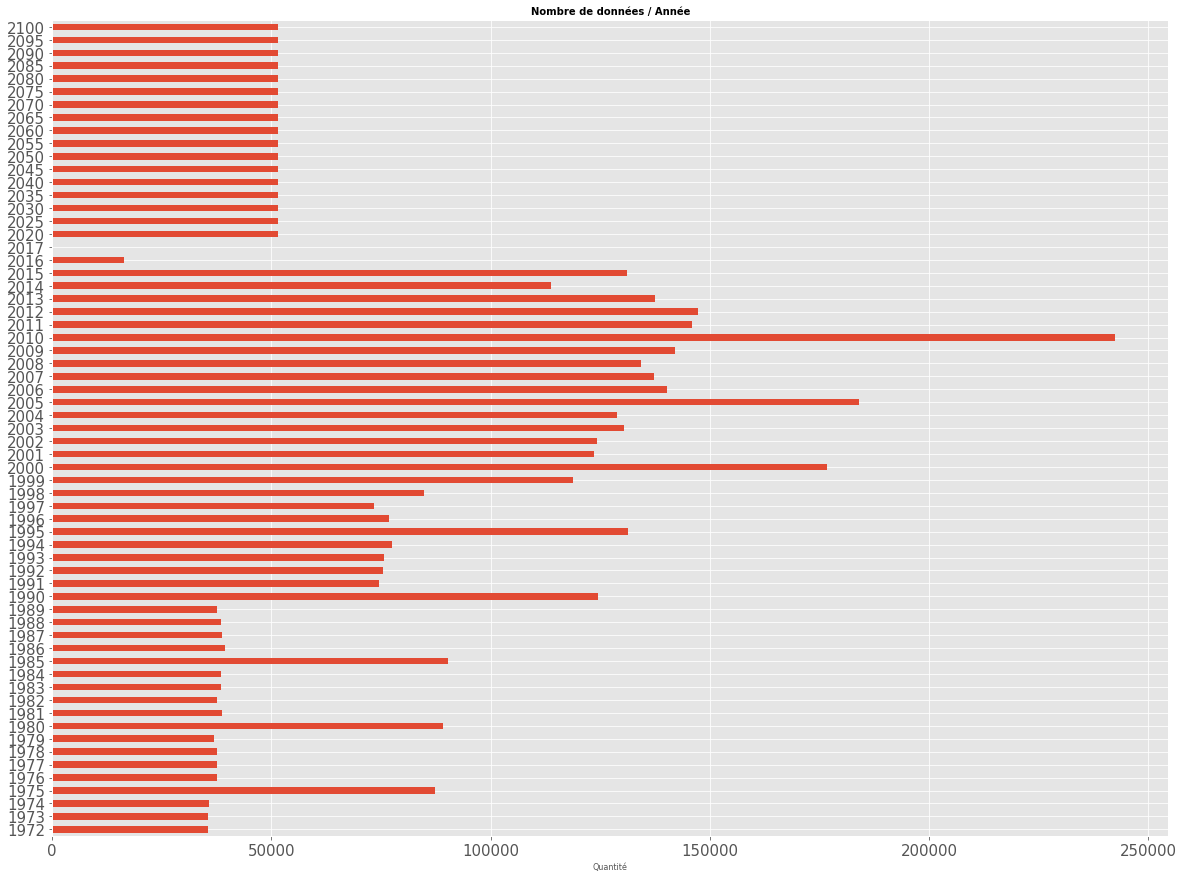

In [43]:
plt.figure(figsize=(20, 15))
data_count.iloc[:, 4:-2].sum(axis=0).plot(kind='barh', width=0.5, fontsize=15)

plt.title('Nombre de données / Année')
plt.xlabel('Quantité')
plt.ylabel('')

plt.show()

Les années ne sont pas toutes significatives, elles restent en grande majorité inexploitables du fait des valeurs manquantes. Notons que les indicateurs après 2015 ne sont pas exploitables, à exclure de l'analyse. Suivant le contexte de l'analyse et les objectifs souhaités, on peut distinguer également les années avant 2000 comme étant moins qualitatives.

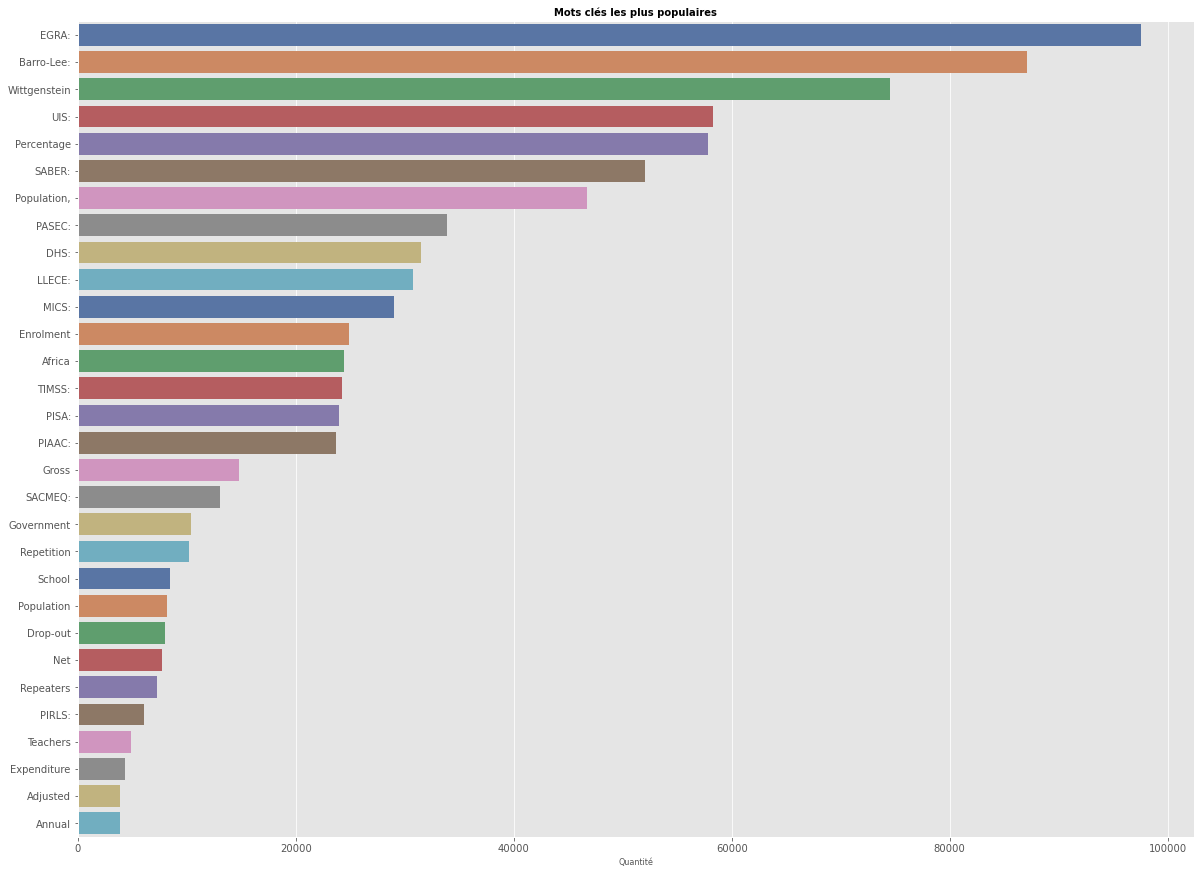

In [44]:

#Popular words checklist
import collections
keyword_list = [i.split(' ', 1)[0] for i in data['Indicator Name'].tolist()]
keywords = pd.DataFrame(collections.Counter(keyword_list).most_common(30),
                                          columns=['keyword', 'count'])
plt.figure(figsize=(20, 15))

sns.barplot(y = 'keyword', x='count', data = keywords, palette='deep')
plt.title('Mots clés les plus populaires')
plt.xlabel('Quantité')
plt.ylabel('')
plt.show()

**Les mots clés les plus représentatifs des 3665 indicateurs sont évocateurs du secteur de l'éducation.**

- EGRA : Early Grade Reading Assessment
- Barro-lee : Dataset relatif à l'éducation
- Wittgenstein : Wittgenstein Centre Human Capital Data Explore
- UIS : UNESCO Institut de Statistiques
- PISA : Tests comparatifs de compétences pour les élèves
- Teachers
- School
- etc…

**Cet échantillon est d'une importance capitale pour répondre aux attentes de l'entreprise.** Un historique sur plusieurs années semble être exploitable, avec des indicateurs propres à l'éducation et des observations selon l'ensemble des pays de Monde. 

<a id='4'></a>

<a id='4'></a>

### **`EdStatsFootNote.csv`**
Informations sur l'année d'origine des données, avec description des données.

[Haut de page](#sommaire)

In [45]:
footnote = pd.read_csv('EdStatsFootNote.csv')
print(footnote.shape)
footnote.head(3)

(643638, 5)


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN

In [46]:
#dtale.show(footnote)

In [47]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(footnote)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


CountryCode    100.0
SeriesCode     100.0
Year           100.0
DESCRIPTION    100.0
Unnamed: 4       0.0
dtype: float64

In [48]:
footnote.duplicated(subset=['CountryCode', 'SeriesCode', 'Year'], keep=False).sum()

0

In [49]:
footnote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [50]:
footnote['Year'] = [y[2:] for y in footnote['Year']]
footnote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [51]:
display(footnote['SeriesCode'].nunique())
display(footnote['DESCRIPTION'].unique().tolist())

1558

['Country estimation.',
 'UIS Estimation',
 'UNESCO Institute for Statistics (UIS) estimate',
 '5-year average value between 0s and 5s',
 'Percentage includes lower secondary education.',
 'Country data',
 'Country Data',
 'UNSD WPP08 revision file 2A and 3A.',
 'Not applicable',
 'Percentage includes all tertiary levels (ISCED 5-8)',
 'Estimated',
 'UIS estimation.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Country estimation',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 9

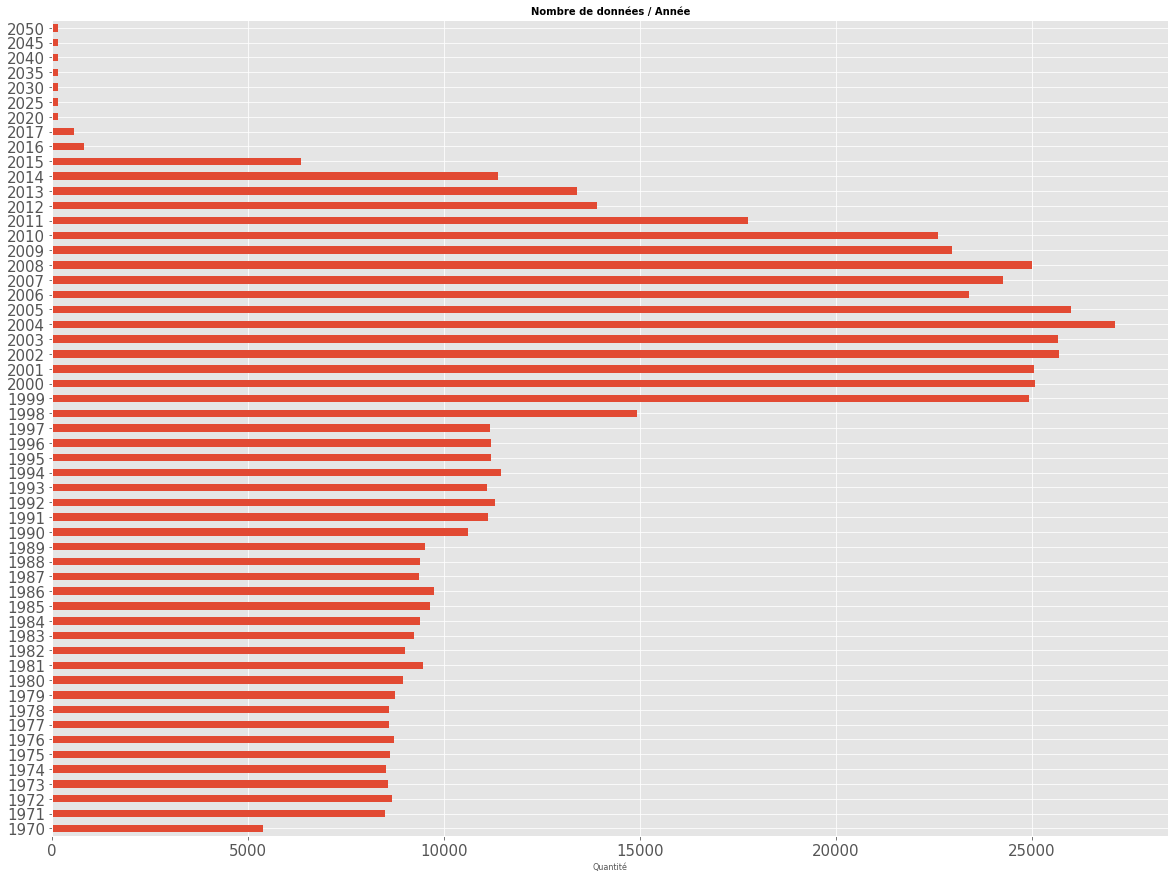

In [52]:
plt.figure(figsize=(20, 15))
footnote.groupby('Year')['Year'].count().plot(kind='barh', width=0.5, fontsize=15)

plt.title('Nombre de données / Année')
plt.xlabel('Quantité')
plt.ylabel('')
plt.show()

**Les données sont plus représentatives entre 2000 et 2015**, on retrouve le même constat que dans l'échantillon précédent. Le contexte métier des cours proposés uniquement en ligne repose principalement sur le déploiement de l'Internet, l'année 2000 peut-être prise comme année de départ dans l'analyse effectuée. Après 2010, les données semblent être de plus en plus incomplètes. Entre 2010 et 2015, les données décroissent, suivant les indicateurs retenus l'analyse pourra se basée jusqu'à 2010 ou 2015.

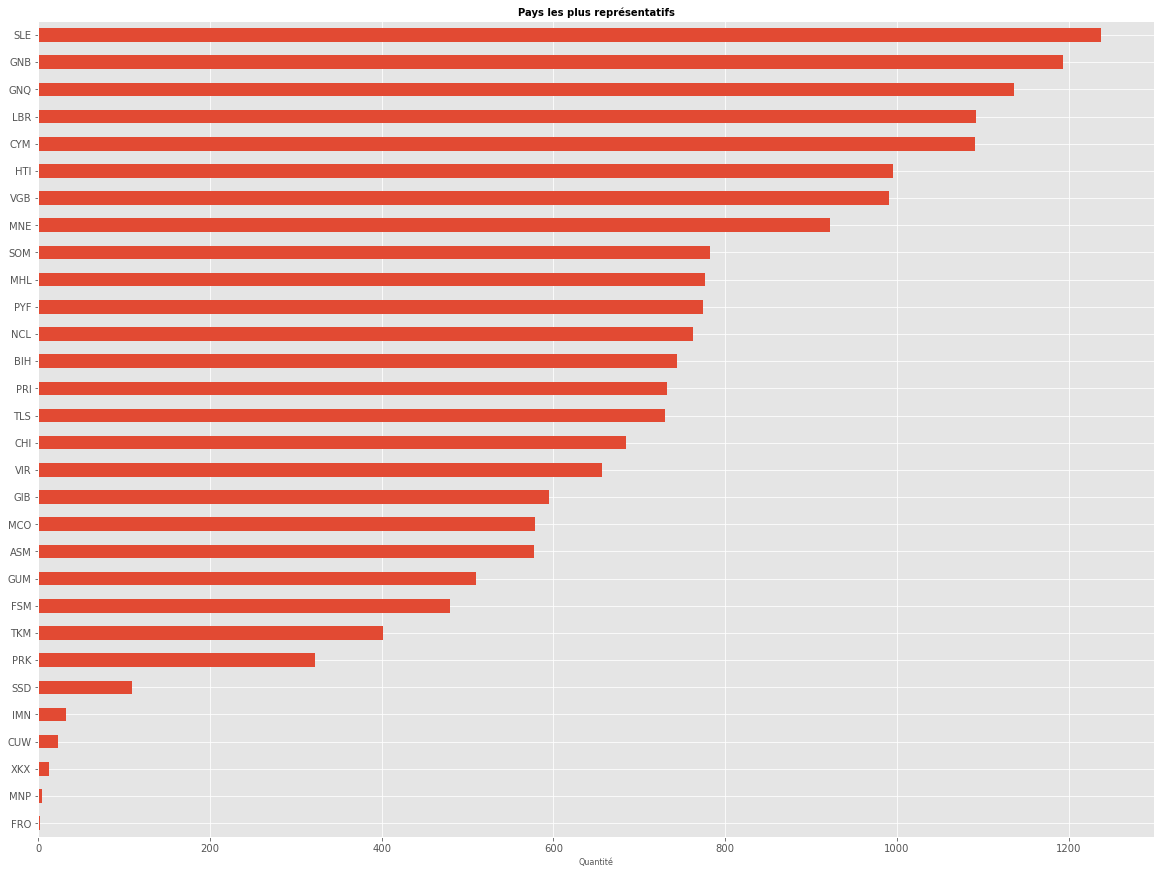

In [53]:
plt.figure(figsize=(20, 15))

footnote.groupby('CountryCode')['Year'].count().sort_values()[:30].plot(kind='barh', width=0.5, fontsize=10)
plt.title('Pays les plus représentatifs')
plt.xlabel('Quantité')
plt.ylabel('')
plt.show()

<a id='5'></a>

<a id='5'></a>

### **`EdStatsSeries.csv`**
Informations descriptives sur les indicateurs socio économiques rencontrés sur les jeux de données précédents.

[Haut de page](#sommaire)

In [54]:
#Loading 'EdStatsSeries.csv'
seriesCode = pd.read_csv('EdStatsSeries.csv')
print(seriesCode.shape)
seriesCode.head(3)

(3665, 21)


Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 21 columns]

In [55]:
#dtale.show(seriesCode)

In [56]:
seriesCode.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [57]:
seriesCode.isna().sum().sort_values(ascending=True)

Series Code                               0
Topic                                     0
Indicator Name                            0
Long definition                           0
Source                                    0
Short definition                       1509
Other notes                            3113
Base Period                            3351
Related source links                   3450
Periodicity                            3566
Aggregation method                     3618
Statistical concept and methodology    3642
Limitations and exceptions             3651
General comments                       3651
Development relevance                  3662
Notes from original source             3665
License Type                           3665
Unit of measure                        3665
Other web links                        3665
Related indicators                     3665
Unnamed: 20                            3665
dtype: int64

In [58]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(seriesCode)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


Series Code                            100.0
Indicator Name                         100.0
Long definition                        100.0
Topic                                  100.0
Source                                 100.0
Short definition                        59.0
Other notes                             15.0
Base Period                              9.0
Related source links                     6.0
Periodicity                              3.0
Aggregation method                       1.0
Statistical concept and methodology      1.0
License Type                             0.0
Related indicators                       0.0
Other web links                          0.0
Limitations and exceptions               0.0
Development relevance                    0.0
General comments                         0.0
Notes from original source               0.0
Unit of measure                          0.0
Unnamed: 20                              0.0
dtype: float64

Notons que seules les 5 premières variables listées ci-dessus peuvent-être exploitées.

In [59]:
seriesCode.duplicated('Series Code').sum()

0

In [60]:
seriesCode['Series Code'].nunique() == data['Indicator Code'].nunique()

True

In [61]:
seriesCode['Source'].unique()

array(['Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/',
       'Demographic and Health Surveys (DHS)',
       'World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS) data',
       'Multiple Indicator Cluster Surveys (MICS)',
       'International Telecommunication Union, World Telecommunication/ICT Development Report and database.',
       'Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/',
       'Latin American Laboratory for Assessment of the Quality of Education (LLECE)',
       "Programme d'Analyse des Systèmes Educatifs de la CONFEMEN/Program for the Analysis of CONFEMEN Education Systems (PASEC): http://www.pasec.confemen.org/",
       'OECD Programme for the International Assessment of Adult Competencies (PIAAC)',
       'International Association for the Evaluation of Educational Achievement (IEA) Progress in International Reading Literacy Study (PIRLS)',
       'OECD Programme for International Student Assessme

In [62]:
seriesCode['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [63]:
seriesCode[seriesCode['Topic'].isin(['Secondary', 'Tertiary'])]['Series Code'].unique() #Restriction example

array(['SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS',
       'SE.SCH.LIFE', 'SE.SCH.LIFE.FE', 'SE.SCH.LIFE.MA', 'SE.SEC.AGES',
       'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS',
       'SE.SEC.CMPT.LO.ZS', 'SE.SEC.DURS', 'SE.SEC.DURS.LO ',
       'SE.SEC.DURS.UP', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE',
       'SE.SEC.ENRL.FE.VO.ZS', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC',
       'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS',
       'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE',
       'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE',
       'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.UP',
       'SE.SEC.ENRR.UP.FE ', 'SE.SEC.ENRR.UP.MA', 'SE.SEC.NENR',
       'SE.SEC.NENR.FE', 'SE.SEC.NENR.MA', 'SE.SEC.PRIV.ZS',
       'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS', 'SE.SEC.PROG.ZS',
       'SE.TER.CMPL.FE.ZS', 'SE.TER.CMPL.MA.ZS', 'SE.TER.CMPL.ZS',
       'SE.TER.ENRL', 'SE.TER.ENRL.

Ici nous comprenons que **la variable 'Topic' peut avoir une utilité** dans la sélection de critères propres au contexte métier. 

---

<a id='6'></a>

### Note de synthèse de la pré-analyse

[Haut de page](#sommaire)

Les données chargées à partir du site worldbank.org permettent en effet d'obtenir un historique d'indicateurs propres à notre problématique métier l'éducation selon les pays, des groupements par zones géographiques, mais également des valeurs à spectres plus larges sur l'économie, la démographie, la richesse, etc… 

- 5 jeux de données à degré d'utilité très variable
- Observations à forte granularité géographique : pays et groupement par zones
- Variables disponibles sur notre contexte métier de l'éducation
- Variables disponibles avec des notions plus larges (population, richesse, technologique, …)
- Historique des données à partir de 1970, mais sans grande utilité causée par les valeurs manquantes
- 2000 à 2015 sont des années recommandées pour le traitement des objectifs attendus

**Détails d'analyse sur nos jeux de données :**

**`EdStatsCountry.csv`**
- Informations très larges sur le contexte économique de chaque pays du Monde.
- 241 observations
- 32 variables
- 2354 valeurs manquantes dont une variable obsolète à supprimer "Unnamed: 31"
- 0 doublon

Les principaux points clés exploitables facilement :
- Notion de 'Région': groupement des pays en 6 zones géographiques
- Notions démographiques
- Devise monétaire

--- 
**`EdStatsCountry-Series.csv`**
- Informations descriptives sur les sources des données du dataframe 'country'.
- 613 observations
- 4 variables (dont une obsolète à supprimer "Unnamed: 3")
- 0 valeur manquante
- 0 doublon

Ce jeu de données n'a pas d'utilité immédiate dans le cadre de l'analyse.

--- 
**`EdStatsData.csv`**
- Informations sur l'évolution de nombreux indicateurs pour chaque pays du Monde.
- 886930 observations
- 3665 indicateurs
- 70 variables (principalement des années de 1970 à 2050)
- 1 variable obsolète à supprimer 'Unnamed: 69'
- Valeurs manquantes en grande quantité sur l'ensemble du couple pays/années
- 2000 à 2010 (voir 2015) années les moins impactées par les valeurs manquantes
- 0 doublon

Ce jeu de données est essentiel dans l'analyse de notre problématique. Malgré les valeurs manquantes, il est indispensable à l'exploitation des indicateurs en fonction des pays.

---
**`EdStatsSeries.csv`**
- Informations descriptives sur les indicateurs du jeu de données précédent.
- 3665 observations
- 21 variables (dont une variable obsolète à supprimer 'Unnamed: 20')
- Valeurs manquantes en grande quantité
- 0 doublon

Ces données apportent plus de détails sur nos indicateurs, il n'y a pas d'utilité directe dans l'analyse effectuée, mais cela peut venir en complément afin de mieux comprendre données. Par exemple, sur une action de choix d'indicateurs, à l'aide d'une première sélection via la variable 'Topic'.

--- 
**`EdStatsFootNote.csv`**
- Informations sur l'année d'origine des données, avec description des données.
- 643638 observations
- 5 variables (dont une variable obsolète à supprimer : 'Unnamed: 4')
- 0 valeurs manquantes (sans tenir compte de 'Unnamed: 4')
- 0 doublon

Les années 2000 à 2015 ressortent également comme étant les plus représentatives en terme de disponibilité d'indicateurs _(années avec le moins de valeurs manquantes._

---

<a id='p2'></a>

## Analyse des données 


[Haut de page](#sommaire)

<a id='7'></a>

### Préparation de DataFrame

In [64]:
#Choisir les colonnes utiles
df_1 = data.copy()
df_1 = df_1.loc[:,['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
            '2010', '2011', '2012', '2013', '2014', '2015', '2016' ]]
print(df_1.shape)
df_1.head(3)

(886930, 11)


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  2010  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   2011  2012  2013  2014  2015  2016  
0   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN

In [65]:
df_1.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2010              644488
2011              740918
2012              739666
2013              749421
2014              773141
2015              755872
2016              870470
dtype: int64

<AxesSubplot:>

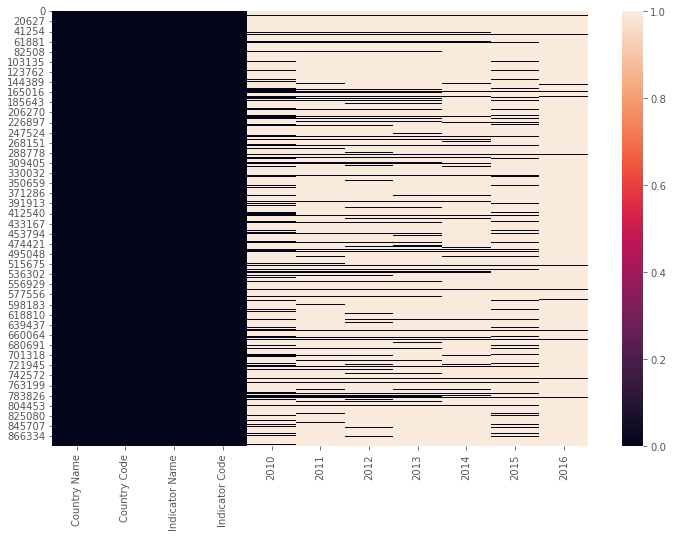

In [66]:
sns.heatmap(df_1.isna())

In [67]:
#Remplir les Nan avec le méthode ffill
df_num = df_1[['2013', '2014', '2015', '2016']]
df_num.fillna(method = 'ffill', axis = 1, inplace = True)

print(df_num.shape)
df_num.head(3)

(886930, 4)


C:\Users\pouri\AppData\Local\Temp/ipykernel_17292/446147208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.fillna(method = 'ffill', axis = 1, inplace = True)


2013  2014  2015  2016
0   NaN   NaN   NaN   NaN
1   NaN   NaN   NaN   NaN
2   NaN   NaN   NaN   NaN

In [68]:
#Créer PDF avec les Nan quasi rempli entre 2013 - 2016
df_2 = pd.concat([df_1[['Country Name','Country Code','Indicator Name','Indicator Code']], df_num], axis = 1 )

print(df_2.shape)
df_2.head(3)

(886930, 8)


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  2013  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   2014  2015  2016  
0   NaN   NaN   NaN  
1   NaN   NaN   NaN  
2   NaN   NaN   NaN

In [69]:
#Supprimer les lignes sans data
df_2.dropna(how='all',inplace=True, subset=['2013', '2014', '2015', '2016'])

print(df_2.shape)
df_2.head(3)

(220528, 8)


Country Name Country Code  \
4   Arab World          ARB   
5   Arab World          ARB   
6   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   
5   Adjusted net enrolment rate, primary, female (%)  SE.PRM.TENR.FE   
6  Adjusted net enrolment rate, primary, gender p...  UIS.NERA.1.GPI   

        2013       2014       2015       2016  
4  85.511940  85.320152  85.320152  85.320152  
5  83.914032  83.820831  83.820831  83.820831  
6   0.964090   0.966200   0.966200   0.966200

<AxesSubplot:>

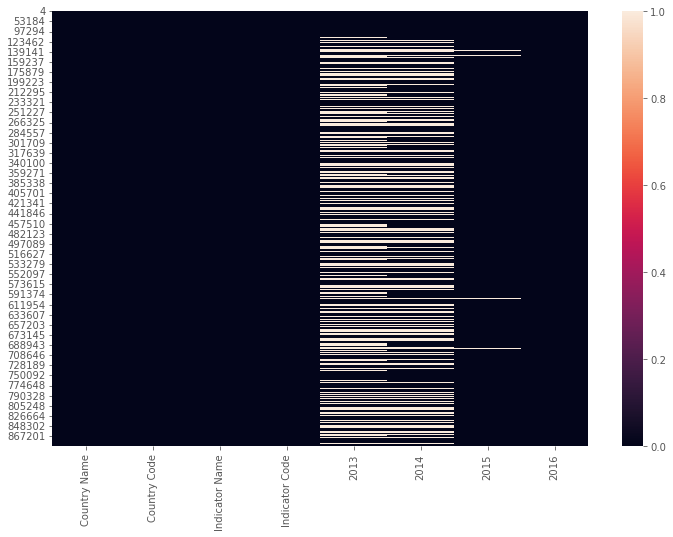

In [70]:
sns.heatmap(df_2.isna())

In [71]:
#DF en prenant une colonne d'année sans les valeurs manquantes
df_pay_an = df_2[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2016']]
df_pay_an.rename(columns = {'2016' : 'value'}, inplace = True)
df_pay_an

C:\Users\pouri\AppData\Local\Temp/ipykernel_17292/2614198006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay_an.rename(columns = {'2016' : 'value'}, inplace = True)


Country Name Country Code  \
4        Arab World          ARB   
5        Arab World          ARB   
6        Arab World          ARB   
7        Arab World          ARB   
12       Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
4       Adjusted net enrolment rate, primary, both sex...   
5        Adjusted net enrolment rate, primary, female (%)   
6       Adjusted net enrolment rate, primary, gender p...   
7          Adjusted net enrolment rate, primary, male (%)   
12      Adjusted net intake rate to Grade 1 of primary...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code          value  
4                SE.PRM.TENR      85.320152  
5             SE.PRM.TENR.FE      83.820831  
6             UIS.NERA.1.GPI       0.966200  
7             SE.PRM.TENR.MA      86.753387  
12                UIS.NIRA.1      76.620567  
...                      ...            ...  
886925      UIS.LP.AG15T24.M  199464.000000  
886926     SE.ADT.1524.LT.ZS      90.428120  
886927  SE.ADT.1524.LT.FE.ZS      93.188350  
886928  SE.ADT.1524.LT.FM.ZS       1.063890  
886929  SE.ADT.1524.LT.MA.ZS      87.591860  

[220528 rows x 5 columns]

In [72]:
df_pay_an.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220528 entries, 4 to 886929
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    220528 non-null  object 
 1   Country Code    220528 non-null  object 
 2   Indicator Name  220528 non-null  object 
 3   Indicator Code  220528 non-null  object 
 4   value           220528 non-null  float64
dtypes: float64(1), object(4)
memory usage: 10.1+ MB


In [73]:
#Ajouter la colonne Region
df_pay_an_reg = pd.merge(df_pay_an, country[['Country Code', 'Region', 'Income Group']], how = 'left', on = 'Country Code' )
df_pay_an_reg

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
220523     Zimbabwe          ZWE   
220524     Zimbabwe          ZWE   
220525     Zimbabwe          ZWE   
220526     Zimbabwe          ZWE   
220527     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, primary, both sex...   
1        Adjusted net enrolment rate, primary, female (%)   
2       Adjusted net enrolment rate, primary, gender p...   
3          Adjusted net enrolment rate, primary, male (%)   
4       Adjusted net intake rate to Grade 1 of primary...   
...                                                   ...   
220523  Youth illiterate population, 15-24 years, male...   
220524  Youth literacy rate, population 15-24 years, b...   
220525  Youth literacy rate, population 15-24 years, f...   
220526  Youth literacy rate, population 15-24 years, g...   
220527  Youth literacy rate, population 15-24 years, m...   

              Indicator Code          value              Region Income Group  
0                SE.PRM.TENR      85.320152                 NaN          NaN  
1             SE.PRM.TENR.FE      83.820831                 NaN          NaN  
2             UIS.NERA.1.GPI       0.966200                 NaN          NaN  
3             SE.PRM.TENR.MA      86.753387                 NaN          NaN  
4                 UIS.NIRA.1      76.620567                 NaN          NaN  
...                      ...            ...                 ...          ...  
220523      UIS.LP.AG15T24.M  199464.000000  Sub-Saharan Africa   Low income  
220524     SE.ADT.1524.LT.ZS      90.428120  Sub-Saharan Africa   Low income  
220525  SE.ADT.1524.LT.FE.ZS      93.188350  Sub-Saharan Africa   Low income  
220526  SE.ADT.1524.LT.FM.ZS       1.063890  Sub-Saharan Africa   Low income  
220527  SE.ADT.1524.LT.MA.ZS      87.591860  Sub-Saharan Africa   Low income  

[220528 rows x 7 columns]

In [74]:
#Supprimer les lignes sans valeur sur la colonne Region
df_pay_an_reg.dropna(subset=['Region'], inplace= True)

print(df_pay_an_reg.shape)
df_pay_an_reg.head(3)

(210933, 7)


Country Name Country Code  \
9168  Afghanistan          AFG   
9169  Afghanistan          AFG   
9170  Afghanistan          AFG   

                                         Indicator Name  Indicator Code  \
9168  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
9169  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
9170  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   

          value      Region Income Group  
9168  50.627232  South Asia   Low income  
9169  37.641541  South Asia   Low income  
9170   0.598370  South Asia   Low income

In [75]:
print(len(df_pay_an_reg['Country Name'].unique()))
df_pay_an_reg['Country Name'].unique()

214


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', '

**Supprimer les pays Low income**

In [76]:
df_pay_an_reg['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [77]:
#Choisir les pays low income
pay_notlow = df_pay_an_reg[df_pay_an_reg['Income Group'] != 'Low income' ]
pay_notlow['Income Group'].unique()

array(['Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [78]:
pay_hight = list(pay_notlow.set_index('Country Code').index.unique())

In [79]:
#supprimer les pays Low income de df 
data_academy_notlow = df_pay_an_reg[df_pay_an_reg['Country Code'].isin(pay_hight)]

print(data_academy_notlow.shape)
data_academy_notlow.head(3)

(175088, 7)


Country Name Country Code  \
9812      Albania          ALB   
9813      Albania          ALB   
9814      Albania          ALB   

                                         Indicator Name  Indicator Code  \
9812  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
9813  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
9814  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   

          value                 Region         Income Group  
9812  88.778252  Europe & Central Asia  Upper middle income  
9813  88.133423  Europe & Central Asia  Upper middle income  
9814   0.986010  Europe & Central Asia  Upper middle income

<a id='8'></a>
---

### Choix des indicateurs

[Haut de page](#sommaire)

In [80]:
data_academy_notlow['Indicator Group'] = data_academy_notlow.loc[:,'Indicator Code'].apply(lambda x: x.split('.')[0])
data_academy_notlow.head(3)

C:\Users\pouri\AppData\Local\Temp/ipykernel_17292/2336255608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_academy_notlow['Indicator Group'] = data_academy_notlow.loc[:,'Indicator Code'].apply(lambda x: x.split('.')[0])


Country Name Country Code  \
9812      Albania          ALB   
9813      Albania          ALB   
9814      Albania          ALB   

                                         Indicator Name  Indicator Code  \
9812  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
9813  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
9814  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   

          value                 Region         Income Group Indicator Group  
9812  88.778252  Europe & Central Asia  Upper middle income             UIS  
9813  88.133423  Europe & Central Asia  Upper middle income             UIS  
9814   0.986010  Europe & Central Asia  Upper middle income             UIS

In [81]:
data_academy_notlow.isna().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
value              0
Region             0
Income Group       0
Indicator Group    0
dtype: int64

In [82]:
# indic_group = data_academy_notlow.loc[:,['Indicator Group' , 'Indicator Code']].drop_duplicates().groupby('Indicator Group').\
#                        count().reset_index().rename(columns={'Indicator Code':'Indicator Counts'})

# # Ajout total en bas de colonne pour le nombre d'indicateurs
# indic_group.loc['Total'] = indic_group.sum(numeric_only=True)

# # Affichage des groupes d'indicateurs avec nombre d'indicateurs par groupe
# indic_group.fillna("")

### Disponibilité des données par groupe d'indicateurs

In [83]:
df_data = data.copy()

In [84]:
df_data['Indicator Group'] = df_data.loc[:,'Indicator Code'].apply(lambda x: x.split('.')[0])
#df_data

**Nombre d'indicateurs par groupe**

In [85]:
# Liste des groupes d'indicateurs et nombre d'indicateurs par groupe
indic_group = df_data.loc[:, ['Indicator Group', 'Indicator Code']].\
    drop_duplicates().groupby('Indicator Group').count().\
    reset_index().\
    rename(columns={'Indicator Code':'Indicator Count'})

# Ajout total en bas de colonne pour le nombre d'indicateurs
indic_group.loc['Total'] = indic_group.sum(numeric_only=True)

# Affichage des groupes d'indicateurs avec nombre d'indicateurs par groupe
print(indic_group.fillna(""))

      Indicator Group  Indicator Count
0                 BAR            360.0
1                  HH            250.0
2                  IT              2.0
3                  LO           1046.0
4                  NY             12.0
5                OECD             16.0
6                 PRJ            308.0
7               SABER            215.0
8                  SE            173.0
9                  SH              2.0
10                 SL             17.0
11                 SP            215.0
12                UIS           1047.0
13               XGDP              2.0
Total                           3665.0


Disponibilité des données par groupe d'indicateurs

In [86]:
# Valeurs non null par années
years_not_null = df_data.loc[:, '1970':'2100'].notnull()

# Ajout de la colonne des groupes d'indicateurs
temp = pd.concat([df_data[['Indicator Group']], years_not_null], axis=1)

# Proportion de données présentes pour chaque groupe
group_indic_null = temp.groupby(['Indicator Group']).mean()

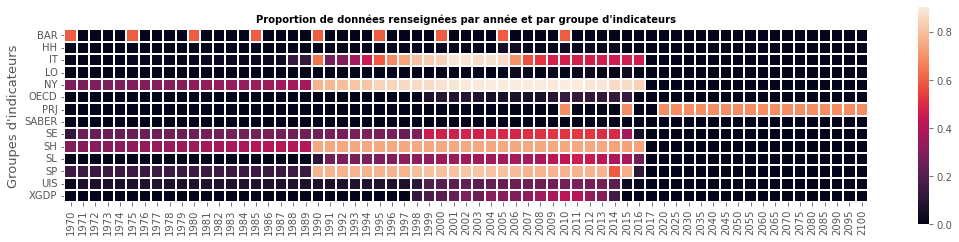

In [87]:
# Heatmap des données présentes par groupe d'indicateurs
fig = plt.figure(figsize=(18,4))

sns.heatmap(group_indic_null, square=True, linewidths=0.1)
plt.title("Proportion de données renseignées par année et par groupe d'indicateurs")
plt.ylabel('Groupes d\'indicateurs', fontsize=13)
plt.show()

In [88]:
#check
#data_academy_notlow[data_academy_notlow['Indicator Group'] == 'UIS']

In [89]:
#check
#data_academy_notlow[data_academy_notlow['Indicator Group'] == 'IT']['Indicator Name'].unique()

In [90]:
#data_academy_notlow[data_academy_notlow['Indicator Group'] == 'HH']['Indicator Code'].unique()

In [91]:
#check
#data_academy_notlow[data_academy_notlow['Indicator Name'] =='Enrolment in tertiary education, all programmes, both sexes (number)'][:1]

(BAR)

- 'Barro-Lee: Population in thousands, age 15-19, total',  'BAR.POP.1519',
- 'Barro-Lee: Population in thousands, age 20-24, total', 'BAR.POP.2024',
- Barro-Lee: Percentage of population age 15-19 with no education , BAR.NOED.1519.ZS	
- 'DHS: Net attendance rate. Secondary', HH.DHS.NAR.23	
- 'MICS: Gross attendance rate. Post Secondary' HH.MICS.GAR.456
- 'MICS: Net attendance rate. Secondary' , HH.MICS.NAR.23
- 'MICS: Transition rate. Primary to Secondary' , HH.MICS.TR.12
- 'Internet users (per 100 people)', ✅**IT.NET.USER.P2** 
- 'Personal computers (per 100 people)' , IT.CMP.PCMP.P2	
-  'GDP per capita (current US$)', ✅**NY.GDP.PCAP.CD** (PIB par habitant (USD courants))	
- 'Enrolment in secondary education, both sexes (number)' , SE.SEC.ENRL  "double"

(SE)

- 'Expenditure on secondary as % of government expenditure on education (%)', SE.XPD.SECO.ZS	
- 'Expenditure on tertiary as % of government expenditure on education (%)' , SE.XPD.TERT.ZS	
- 'Gross enrolment ratio, secondary, both sexes (%)', SE.SEC.ENRR	
- 'Gross enrolment ratio, tertiary, both sexes (%)', SE.TER.ENRR	
- 'Enrolment in secondary education, both sexes (number)' ✅**SE.SEC.ENRL**(Inscription dans l'enseignement secondaire) 
- 'Enrolment in tertiary education, all programmes, both sexes (number)' ✅**SE.TER.ENRL**(Inscription dans l'enseignement  supérieur) 
   
(sp)
- 'Population growth (annual %)' , ✅**SP.POP.GROW**(Croissance démographique (% annuel)) 
- 'Population of the official age for secondary education, both sexes (number)', ✅**SP.SEC.TOTL.IN** (Population d'âge officiel pour l'enseignement secondaire) 
-  'Population of the official age for tertiary education, both sexes (number)' , ✅**SP.TER.TOTL.IN** (Population d'âge officiel pour l'enseignement supérieur) 

(XGDP)

- 'Government expenditure in secondary institutions education as % of GDP (%)' , XGDP.23.FSGOV.FDINSTADM.FFD	
- 'Government expenditure in tertiary institutions as % of GDP (%)' , XGDP.56.FSGOV.FDINSTADM.FFD	

Notion d'évolution dans les prochaines années avec l'indicateur : ✅**PRJ.POP.ALL.4.MF**  
- "Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary."\
Cet indicateur pourra servir de repère pour les années futures. En effet, l'indicateur donne une projection sur l'évolution de la réussite en enseignement supérieur. Dans notre contexte, on pourra prendre un intervalle de 10 ans, de 2020 à 2030 par exemple.

In [92]:
indicators_choix = [ #Checklist of selected indicators
    'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN',
    'SP.POP.GROW',    'SE.SEC.ENRL',
    'SE.TER.ENRL',    'NY.GDP.PCAP.CD',
    'IT.NET.USER.P2','HH.DHS.NAR.23',
    'HH.MICS.GAR.456','HH.MICS.NAR.23', 
    'HH.MICS.TR.12', 'SP.POP.TOTL']

In [93]:
#DF avec les indicateurs souhaités
data_academy_notlow = data_academy_notlow[data_academy_notlow['Indicator Code'].isin(indicators_choix)]
print(data_academy_notlow.shape)
data_academy_notlow.head(3)

(1300, 8)


Country Name Country Code  \
9921      Albania          ALB   
9934      Albania          ALB   
9966      Albania          ALB   

                                         Indicator Name  Indicator Code  \
9921  Enrolment in secondary education, both sexes (...     SE.SEC.ENRL   
9934  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
9966                       GDP per capita (current US$)  NY.GDP.PCAP.CD   

             value                 Region         Income Group Indicator Group  
9921  315079.00000  Europe & Central Asia  Upper middle income              SE  
9934  160527.00000  Europe & Central Asia  Upper middle income              SE  
9966    4124.98239  Europe & Central Asia  Upper middle income              NY

---
On séléctionne uniquement les pays pour lesquels chacun a plus de 100 indicateurs renseignés

In [94]:
#Supprimer les pays avec moins de 100 indicateurs
list_indic = data_academy_notlow['Indicator Code'].value_counts() > 100
list_indic

SP.POP.GROW         True
SP.POP.TOTL         True
NY.GDP.PCAP.CD      True
IT.NET.USER.P2      True
SP.SEC.TOTL.IN      True
SP.TER.TOTL.IN      True
SE.SEC.ENRL         True
SE.TER.ENRL         True
HH.DHS.NAR.23      False
HH.MICS.GAR.456    False
HH.MICS.NAR.23     False
Name: Indicator Code, dtype: bool

In [95]:
#Choisir les indicateurs utilisés pour plus de 100 pays
new_indic_list = ['SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN',
                  'SP.POP.GROW',    'SE.SEC.ENRL',
                  'SE.TER.ENRL',    'NY.GDP.PCAP.CD',
                  'IT.NET.USER.P2', 'SP.POP.TOTL']

In [96]:
#DF avec 8 indicateurs choisis
data_academy_notlow = data_academy_notlow[data_academy_notlow['Indicator Code'].isin(new_indic_list)]
print(f'shape -->{data_academy_notlow.shape}')
print(f'Nan --> {data_academy_notlow.isna().sum().sum()}')
data_academy_notlow.head(3)

shape -->(1284, 8)
Nan --> 0


Country Name Country Code  \
9921      Albania          ALB   
9934      Albania          ALB   
9966      Albania          ALB   

                                         Indicator Name  Indicator Code  \
9921  Enrolment in secondary education, both sexes (...     SE.SEC.ENRL   
9934  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
9966                       GDP per capita (current US$)  NY.GDP.PCAP.CD   

             value                 Region         Income Group Indicator Group  
9921  315079.00000  Europe & Central Asia  Upper middle income              SE  
9934  160527.00000  Europe & Central Asia  Upper middle income              SE  
9966    4124.98239  Europe & Central Asia  Upper middle income              NY

In [97]:
#Créer le pivot table de pays et indicateurs
pay_indic = data_academy_notlow.pivot_table(index='Country Name', columns='Indicator Code', 
                                      values='value', 
                                      aggfunc='mean').reset_index()
print(f'shape -->{pay_indic.shape}')
print(f'Nan --> {pay_indic.isna().sum().sum()}')
pay_indic.head(3)

shape -->(180, 9)
Nan --> 156


Indicator Code    Country Name  IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  \
0                      Albania       66.363445     4124.982390     315079.0   
1                      Algeria       42.945527     3916.881571          NaN   
2               American Samoa             NaN    11834.745229          NaN   

Indicator Code  SE.TER.ENRL  SP.POP.GROW  SP.POP.TOTL  SP.SEC.TOTL.IN  \
0                  160527.0    -0.159880    2876101.0        311514.0   
1                 1289474.0     1.825463   40606052.0       4056674.0   
2                       NaN     0.111575      55599.0             NaN   

Indicator Code  SP.TER.TOTL.IN  
0                     276247.0  
1                    3492401.0  
2                          NaN

In [98]:
#choisir les pays avec une population supérieure a 500_000
pay_indic = pay_indic[pay_indic['SP.POP.TOTL'] > 500_000]
print(f'shape -->{pay_indic.shape}')
print(f'Nan --> {pay_indic.isna().sum().sum()}')
pay_indic.head(3)

shape -->(136, 9)
Nan --> 61


Indicator Code Country Name  IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  \
0                   Albania       66.363445     4124.982390     315079.0   
1                   Algeria       42.945527     3916.881571          NaN   
4                    Angola       13.000000     3308.700233          NaN   

Indicator Code  SE.TER.ENRL  SP.POP.GROW  SP.POP.TOTL  SP.SEC.TOTL.IN  \
0                  160527.0    -0.159880    2876101.0        311514.0   
1                 1289474.0     1.825463   40606052.0       4056674.0   
4                  221037.0     3.367572   28813463.0       3691322.0   

Indicator Code  SP.TER.TOTL.IN  
0                     276247.0  
1                    3492401.0  
4                    2374694.0

In [99]:
#Créer le pivot table de regions et indicateurs
region_indic = data_academy_notlow.pivot_table(index='Region', columns='Indicator Code', 
                                      values='value', 
                                      aggfunc='mean').reset_index()

print(region_indic.shape)
print(f'Nan --> {region_indic.isna().sum().sum()}')
region_indic.head(3)

(7, 9)
Nan --> 0


Indicator Code                     Region  IT.NET.USER.P2  NY.GDP.PCAP.CD  \
0                     East Asia & Pacific       52.179424    16404.515246   
1                   Europe & Central Asia       75.830612    28955.378313   
2               Latin America & Caribbean       57.212615    10669.059452   

Indicator Code   SE.SEC.ENRL   SE.TER.ENRL  SP.POP.GROW   SP.POP.TOTL  \
0               6.758453e+06  3.959932e+06     1.115729  6.603785e+07   
1               1.553777e+06  7.963145e+05     0.396310  1.612903e+07   
2               1.922417e+06  8.746018e+05     0.876786  1.566947e+07   

Indicator Code  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  
0                 5.944854e+06    5.974845e+06  
1                 1.459580e+06    1.152431e+06  
2                 1.894529e+06    1.513414e+06

In [100]:
country.rename(columns={'Short Name':'Country Name'}, inplace = True)

In [101]:
#DF indic + pays + region + Income Group
pay_reg_indic =  pd.merge(pay_indic, country[['Country Name', 'Region', 'Income Group']], how = 'inner', on = 'Country Name' )
print(pay_reg_indic.shape)
print(f'Nan --> {pay_reg_indic.isna().sum()}')
pay_reg_indic.head(3)

(127, 11)
Nan --> Country Name       0
IT.NET.USER.P2     2
NY.GDP.PCAP.CD     2
SE.SEC.ENRL       22
SE.TER.ENRL       24
SP.POP.GROW        0
SP.POP.TOTL        0
SP.SEC.TOTL.IN     3
SP.TER.TOTL.IN     5
Region             0
Income Group       0
dtype: int64


Country Name  IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  \
0      Albania       66.363445     4124.982390     315079.0     160527.0   
1      Algeria       42.945527     3916.881571          NaN    1289474.0   
2       Angola       13.000000     3308.700233          NaN     221037.0   

   SP.POP.GROW  SP.POP.TOTL  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0    -0.159880    2876101.0        311514.0        276247.0   
1     1.825463   40606052.0       4056674.0       3492401.0   
2     3.367572   28813463.0       3691322.0       2374694.0   

                       Region         Income Group  
0       Europe & Central Asia  Upper middle income  
1  Middle East & North Africa  Upper middle income  
2          Sub-Saharan Africa  Upper middle income

In [102]:
# pay_reg_indic['group_pays'] = pay_reg_indic[['Region', 'Income Group']].apply(lambda x: (', ').join(x), axis = 1)
# print(pay_reg_indic.shape)
# print(f'Nan --> {pay_reg_indic.isna().sum()}')
# pay_reg_indic.head(3)

In [103]:
#dtale.show(pay_reg_indic)

<a id='9'></a>
---

### Remplir les valeurs manquantes

[Haut de page](#sommaire)

In [104]:
pay_reg_indic.head(3)

Country Name  IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  \
0      Albania       66.363445     4124.982390     315079.0     160527.0   
1      Algeria       42.945527     3916.881571          NaN    1289474.0   
2       Angola       13.000000     3308.700233          NaN     221037.0   

   SP.POP.GROW  SP.POP.TOTL  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0    -0.159880    2876101.0        311514.0        276247.0   
1     1.825463   40606052.0       4056674.0       3492401.0   
2     3.367572   28813463.0       3691322.0       2374694.0   

                       Region         Income Group  
0       Europe & Central Asia  Upper middle income  
1  Middle East & North Africa  Upper middle income  
2          Sub-Saharan Africa  Upper middle income

In [105]:
#pay_reg_indic_group.head(3)

In [106]:
X = pay_reg_indic.iloc[:,1:-2]
print(f'Nan --> {X.isna().sum().sum()}')
X.head(3)

Nan --> 58


IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  \
0       66.363445     4124.982390     315079.0     160527.0    -0.159880   
1       42.945527     3916.881571          NaN    1289474.0     1.825463   
2       13.000000     3308.700233          NaN     221037.0     3.367572   

   SP.POP.TOTL  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  
0    2876101.0        311514.0        276247.0  
1   40606052.0       4056674.0       3492401.0  
2   28813463.0       3691322.0       2374694.0

In [107]:
X.columns

Index(['IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'SE.SEC.ENRL', 'SE.TER.ENRL',
       'SP.POP.GROW', 'SP.POP.TOTL', 'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN'],
      dtype='object')

In [108]:
imputer = KNNImputer(n_neighbors=2)
Y = imputer.fit_transform(X)
#print(f'Nan --> {pd.DataFrame(Y).isna().sum().sum()}')
 
df_imputer = pd.DataFrame(Y, columns = X.columns)
df_ready_imputer = pd.concat([pay_reg_indic[['Country Name','Region']], df_imputer], axis = 1 )
df_ready_imputer.drop('SP.POP.TOTL', axis=1, inplace=True)
print(df_ready_imputer.shape)
print(f'Nan --> {df_ready_imputer.isna().sum().sum()}')
df_ready_imputer.tail(3)


(127, 9)
Nan --> 0


Country Name                      Region  IT.NET.USER.P2  \
124             Vietnam         East Asia & Pacific       46.500000   
125  West Bank and Gaza  Middle East & North Africa       61.178385   
126              Zambia          Sub-Saharan Africa       25.506579   

     NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  \
124     2214.387662   7166669.25    2466643.0     1.071293       9377680.0   
125     2943.404534    721414.00     221018.0     2.884693        869213.0   
126     1269.573537   1576502.50     476389.5     3.002816       1882524.0   

     SP.TER.TOTL.IN  
124       8554144.0  
125        499101.0  
126       1497656.0

<a id='p3'></a>

## Visualisation

<a id='10'></a>

### Indicateur sur les ressources informatiques

[Haut de page](#sommaire)

**`IT.NET.USER.P2`**


In [109]:
new_indic_list

['SP.SEC.TOTL.IN',
 'SP.TER.TOTL.IN',
 'SP.POP.GROW',
 'SE.SEC.ENRL',
 'SE.TER.ENRL',
 'NY.GDP.PCAP.CD',
 'IT.NET.USER.P2',
 'SP.POP.TOTL']

In [110]:
df_it_net = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'IT.NET.USER.P2'].sort_values('value', ascending = False)
print(df_it_net.shape)
print(f'Nan --> {df_it_net.isna().sum().sum()}')
df_it_net.head(5)

(168, 8)
Nan --> 0


Country Name Country Code                   Indicator Name  \
94390         Iceland          ISL  Internet users (per 100 people)   
120220  Liechtenstein          LIE  Internet users (per 100 people)   
29430         Bermuda          BMU  Internet users (per 100 people)   
21409         Bahrain          BHR  Internet users (per 100 people)   
12393         Andorra          AND  Internet users (per 100 people)   

        Indicator Code      value                      Region  \
94390   IT.NET.USER.P2  98.240016       Europe & Central Asia   
120220  IT.NET.USER.P2  98.093904       Europe & Central Asia   
29430   IT.NET.USER.P2  98.000000               North America   
21409   IT.NET.USER.P2  97.999981  Middle East & North Africa   
12393   IT.NET.USER.P2  97.930637       Europe & Central Asia   

                Income Group Indicator Group  
94390      High income: OECD              IT  
120220  High income: nonOECD              IT  
29430   High income: nonOECD              IT  
21409   High income: nonOECD              IT  
12393   High income: nonOECD              IT

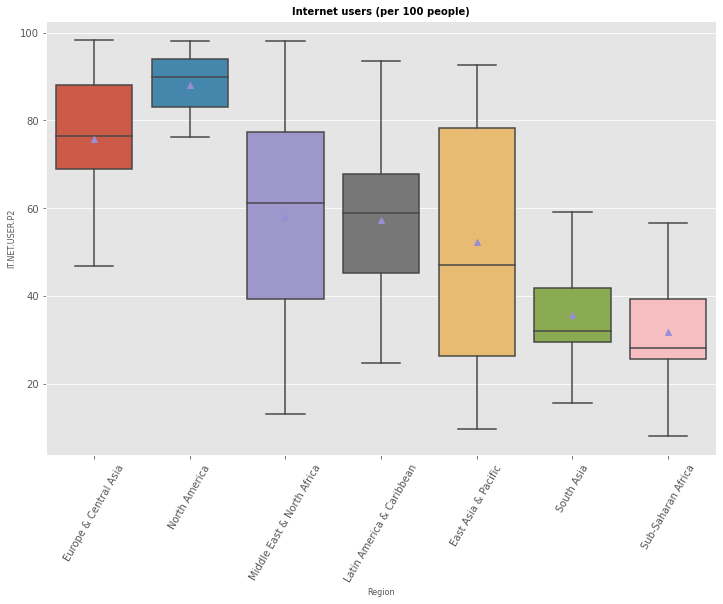

In [111]:
# Boite à moustaches, couverture internet de chaque pays
sns.boxplot(data=df_it_net, y='value', x='Region', showfliers=False, showmeans=True)
plt.ylabel('IT.NET.USER.P2')
plt.xticks(rotation=60)
plt.title("Internet users (per 100 people)")
plt.style.use('ggplot')
plt.show()

Il y a de fortes inégalités entre régions géographiques mais également au sein d'une même région

---

In [112]:
px.box(df_it_net, x='Region', y = 'value', points='all')

In [113]:
fig_it_pays = px.density_heatmap(df_ready_imputer, x='IT.NET.USER.P2', y='Country Name')
fig_it_pays

<a id='11'></a>

### Indicateurs sur richesse des pays

[Haut de page](#sommaire)

**`NY.GDP.PCAP.CD`**


In [114]:
df_it_GBP = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'NY.GDP.PCAP.CD'].sort_values('value', ascending = False)
print(df_it_GBP.shape)
print(f'Nan --> {df_it_GBP.isna().sum().sum()}')
df_it_GBP.head(5)

(168, 8)
Nan --> 0


Country Name Country Code                Indicator Name  \
120160  Liechtenstein          LIE  GDP per capita (current US$)   
122203     Luxembourg          LUX  GDP per capita (current US$)   
29339         Bermuda          BMU  GDP per capita (current US$)   
100709    Isle of Man          IMN  GDP per capita (current US$)   
192270    Switzerland          CHE  GDP per capita (current US$)   

        Indicator Code          value                 Region  \
120160  NY.GDP.PCAP.CD  168146.015281  Europe & Central Asia   
122203  NY.GDP.PCAP.CD  100573.139978  Europe & Central Asia   
29339   NY.GDP.PCAP.CD   85748.065414          North America   
100709  NY.GDP.PCAP.CD   81672.022705  Europe & Central Asia   
192270  NY.GDP.PCAP.CD   79890.524005  Europe & Central Asia   

                Income Group Indicator Group  
120160  High income: nonOECD              NY  
122203     High income: OECD              NY  
29339   High income: nonOECD              NY  
100709  High income: nonOECD              NY  
192270     High income: OECD              NY

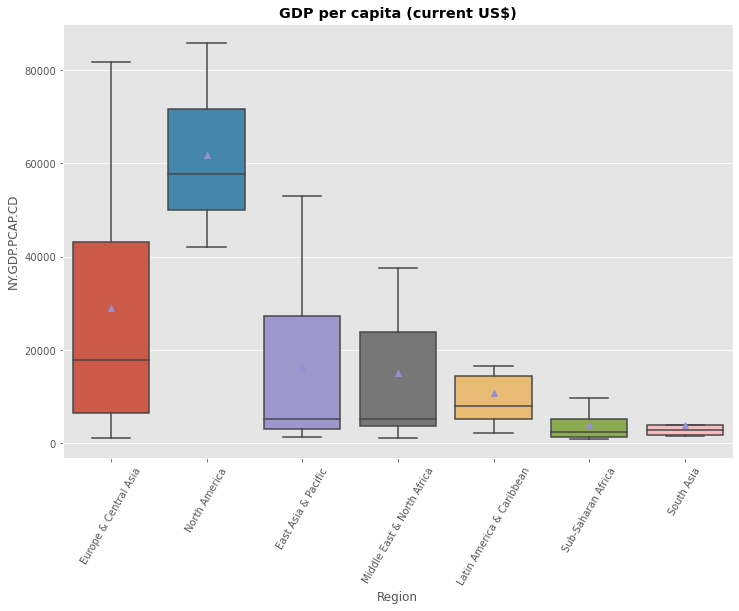

In [115]:
# Boite à moustaches,GDP de chaque pays
sns.boxplot(data=df_it_GBP, y='value', x='Region', showfliers=False, showmeans=True)
plt.ylabel('NY.GDP.PCAP.CD')
plt.xticks(rotation=60)
plt.title("GDP per capita (current US$)")
plt.style.use('ggplot')
plt.show()

In [116]:
fig_NY = px.density_heatmap(df_ready_imputer, x='NY.GDP.PCAP.CD', y='Region')
fig_NY

In [117]:
fig_NY_pays = px.density_heatmap(df_ready_imputer, x='NY.GDP.PCAP.CD', y='Country Name')
fig_NY_pays

<a id='12'></a>

### Indicateurs sur la population

[Haut de page](#sommaire)

**`SP.POP.GROW`**


In [118]:
df_it_GROW = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'SP.POP.GROW'].sort_values('value', ascending = False)
print(df_it_GROW.shape)
print(f'Nan --> {df_it_GROW.isna().sum().sum()}')
df_it_GROW.head(5)

(180, 8)
Nan --> 0


Country Name Country Code                Indicator Name  \
153488               Oman          OMN  Population growth (annual %)   
182563        South Sudan          SSD  Population growth (annual %)   
70755   Equatorial Guinea          GNQ  Population growth (annual %)   
21685             Bahrain          BHR  Population growth (annual %)   
163994              Qatar          QAT  Population growth (annual %)   

       Indicator Code     value                      Region  \
153488    SP.POP.GROW  5.217721  Middle East & North Africa   
182563    SP.POP.GROW  4.144916          Sub-Saharan Africa   
70755     SP.POP.GROW  3.847227          Sub-Saharan Africa   
21685     SP.POP.GROW  3.812797  Middle East & North Africa   
163994    SP.POP.GROW  3.495070  Middle East & North Africa   

                Income Group Indicator Group  
153488  High income: nonOECD              SP  
182563   Lower middle income              SP  
70755   High income: nonOECD              SP  
21685   High income: nonOECD              SP  
163994  High income: nonOECD              SP

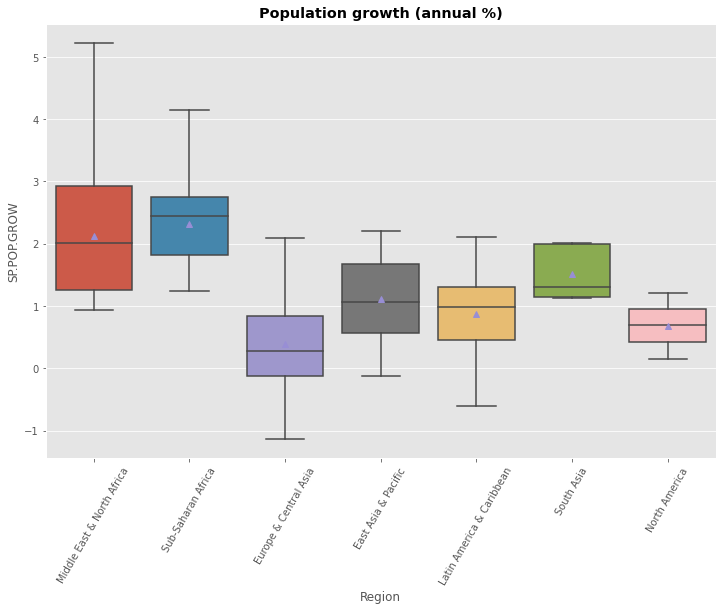

In [119]:
# Boite à moustaches,changament de pop de chaque pays
sns.boxplot(data=df_it_GROW, y='value', x='Region', showfliers=False, showmeans=True)
plt.ylabel('SP.POP.GROW')
plt.xticks(rotation=60)
plt.title("Population growth (annual %)")
plt.style.use('ggplot')
plt.show()

In [120]:
fig_pop = px.density_heatmap(df_ready_imputer, x='SP.POP.GROW', y='Region')
fig_pop

In [121]:
fig_pop_pays = px.density_heatmap(df_ready_imputer, x='SP.POP.GROW', y='Country Name')
fig_pop_pays

**`SP.SEC.TOTL.IN`**


In [122]:
df_it_SEC = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'SP.SEC.TOTL.IN'].sort_values('value', ascending = False)
print(df_it_SEC.shape)
print(f'Nan --> {df_it_SEC.isna().sum().sum()}')
df_it_SEC.head(5)

(161, 8)
Nan --> 0


Country Name Country Code  \
95530         India          IND   
48738         China          CHN   
96821     Indonesia          IDN   
154316     Pakistan          PAK   
150951      Nigeria          NGA   

                                           Indicator Name  Indicator Code  \
95530   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
48738   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
96821   Population of the official age for secondary e...  SP.SEC.TOTL.IN   
154316  Population of the official age for secondary e...  SP.SEC.TOTL.IN   
150951  Population of the official age for secondary e...  SP.SEC.TOTL.IN   

              value               Region         Income Group Indicator Group  
95530   175129728.0           South Asia  Lower middle income              SP  
48738    90093744.0  East Asia & Pacific  Upper middle income              SP  
96821    27933138.0  East Asia & Pacific  Lower middle income              SP  
154316   27125616.0           South Asia  Lower middle income              SP  
150951   24779872.0   Sub-Saharan Africa  Lower middle income              SP

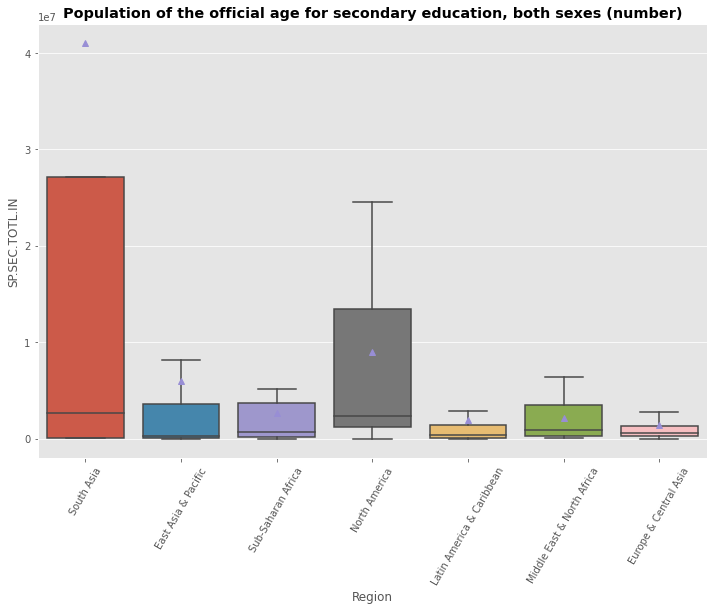

In [123]:
# Boite à moustaches,secondary pop de chaque pays
sns.boxplot(data=df_it_SEC, y='value', x='Region', showfliers=False, showmeans=True)
plt.ylabel('SP.SEC.TOTL.IN')
plt.xticks(rotation=60)
plt.title("Population of the official age for secondary education, both sexes (number)")
plt.style.use('ggplot')
plt.show()

In [124]:
fig_pop_sec = px.density_heatmap(df_ready_imputer, x='SP.SEC.TOTL.IN', y='Region')
fig_pop_sec

In [125]:
fig_pop_sec_pays = px.density_heatmap(df_ready_imputer, x='SP.SEC.TOTL.IN', y='Country Name')
fig_pop_sec_pays

**`SP.TER.TOTL.IN`**


In [126]:
df_it_TER = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'SP.TER.TOTL.IN'].sort_values('value', ascending = False)
print(df_it_TER.shape)
print(f'Nan --> {df_it_TER.isna().sum().sum()}')
df_it_TER.head(5)

(159, 8)
Nan --> 0


Country Name Country Code  \
95533           India          IND   
48741           China          CHN   
210572  United States          USA   
96824       Indonesia          IDN   
154319       Pakistan          PAK   

                                           Indicator Name  Indicator Code  \
95533   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
48741   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
210572  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
96824   Population of the official age for tertiary ed...  SP.TER.TOTL.IN   
154319  Population of the official age for tertiary ed...  SP.TER.TOTL.IN   

              value               Region         Income Group Indicator Group  
95533   119469984.0           South Asia  Lower middle income              SP  
48741    99943816.0  East Asia & Pacific  Upper middle income              SP  
210572   22765372.0        North America    High income: OECD              SP  
96824    21059620.0  East Asia & Pacific  Lower middle income              SP  
154319   18852632.0           South Asia  Lower middle income              SP

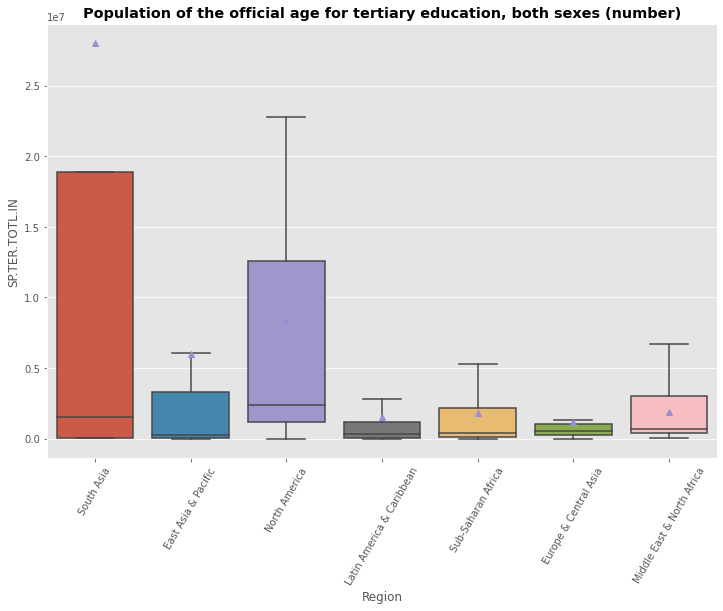

In [127]:
# Boite à moustaches,tertiary pop de chaque pays
sns.boxplot(data=df_it_TER, y='value', x='Region', showfliers=False, showmeans=True)
plt.ylabel('SP.TER.TOTL.IN')
plt.xticks(rotation=60)
plt.title("Population of the official age for tertiary education, both sexes (number)")
plt.style.use('ggplot')
plt.show()

In [128]:
fig_pop_ter = px.density_heatmap(df_ready_imputer, x='SP.TER.TOTL.IN', y='Region')
fig_pop_ter

In [129]:
fig_pop_ter_pays = px.density_heatmap(df_ready_imputer, x='SP.TER.TOTL.IN', y='Country Name')
fig_pop_ter_pays

<a id='13'></a>

### Indicateurs relatifs à l'éducation

[Haut de page](#sommaire)

**`SE.SEC.ENRL`**


In [130]:
df_it_SE_SEC = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'SE.SEC.ENRL'].sort_values('value', ascending = False)
print(df_it_SE_SEC.shape)
print(f'Nan --> {df_it_SE_SEC.isna().sum().sum()}')
df_it_SE_SEC.head(5)

(140, 8)
Nan --> 0


Country Name Country Code  \
95172           India          IND   
48372           China          CHN   
210135  United States          USA   
96312       Indonesia          IDN   
33696          Brazil          BRA   

                                           Indicator Name Indicator Code  \
95172   Enrolment in secondary education, both sexes (...    SE.SEC.ENRL   
48372   Enrolment in secondary education, both sexes (...    SE.SEC.ENRL   
210135  Enrolment in secondary education, both sexes (...    SE.SEC.ENRL   
96312   Enrolment in secondary education, both sexes (...    SE.SEC.ENRL   
33696   Enrolment in secondary education, both sexes (...    SE.SEC.ENRL   

              value                     Region         Income Group  \
95172   129542056.0                 South Asia  Lower middle income   
48372    86127200.0        East Asia & Pacific  Upper middle income   
210135   24229776.0              North America    High income: OECD   
96312    23756316.0        East Asia & Pacific  Lower middle income   
33696    23501784.0  Latin America & Caribbean  Upper middle income   

       Indicator Group  
95172               SE  
48372               SE  
210135              SE  
96312               SE  
33696               SE

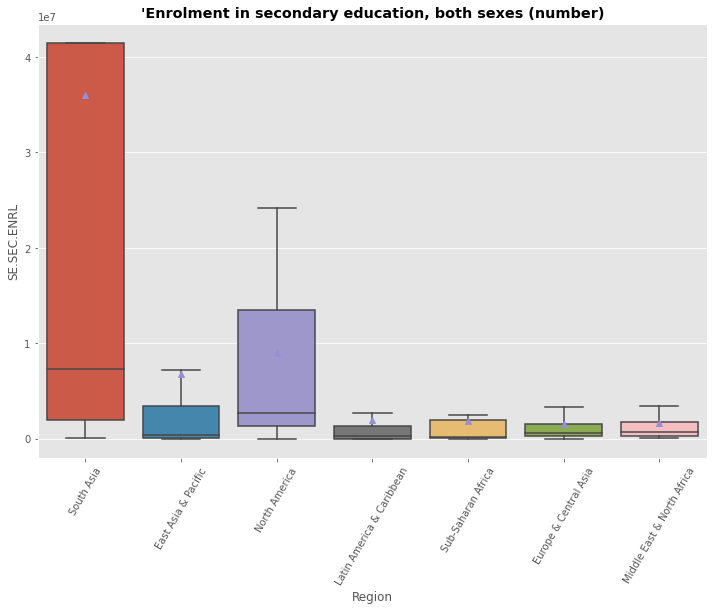

In [131]:
# Boite à moustaches,Enrolment secondary education de chaque pays
sns.boxplot(data=df_it_SE_SEC, y='value', x='Region', showfliers=False, showmeans=True)
plt.ylabel('SE.SEC.ENRL')
plt.xticks(rotation=60)
plt.title("'Enrolment in secondary education, both sexes (number)")
plt.style.use('ggplot')
plt.show()

In [132]:
fig_se_sec = px.density_heatmap(df_ready_imputer, x='SE.SEC.ENRL', y='Region')
fig_se_sec

In [133]:
fig_se_sec_pays = px.density_heatmap(df_ready_imputer, x='SE.SEC.ENRL', y='Country Name')
fig_se_sec_pays

**`SE.TER.ENRL`**


In [134]:
df_it_SE_TER = data_academy_notlow[data_academy_notlow['Indicator Code'] == 'SE.TER.ENRL'].sort_values('value', ascending = False)
print(df_it_SE_TER.shape)
print(f'Nan --> {df_it_SE_TER.isna().sum().sum()}')
df_it_SE_TER.head(5)

(128, 8)
Nan --> 0


Country Name Country Code  \
48385                China          CHN   
95185                India          IND   
210146       United States          USA   
33709               Brazil          BRA   
166118  Russian Federation          RUS   

                                           Indicator Name Indicator Code  \
48385   Enrolment in tertiary education, all programme...    SE.TER.ENRL   
95185   Enrolment in tertiary education, all programme...    SE.TER.ENRL   
210146  Enrolment in tertiary education, all programme...    SE.TER.ENRL   
33709   Enrolment in tertiary education, all programme...    SE.TER.ENRL   
166118  Enrolment in tertiary education, all programme...    SE.TER.ENRL   

             value                     Region          Income Group  \
48385   43367392.0        East Asia & Pacific   Upper middle income   
95185   32107420.0                 South Asia   Lower middle income   
210146  19531728.0              North America     High income: OECD   
33709    8285475.0  Latin America & Caribbean   Upper middle income   
166118   6592416.0      Europe & Central Asia  High income: nonOECD   

       Indicator Group  
48385               SE  
95185               SE  
210146              SE  
33709               SE  
166118              SE

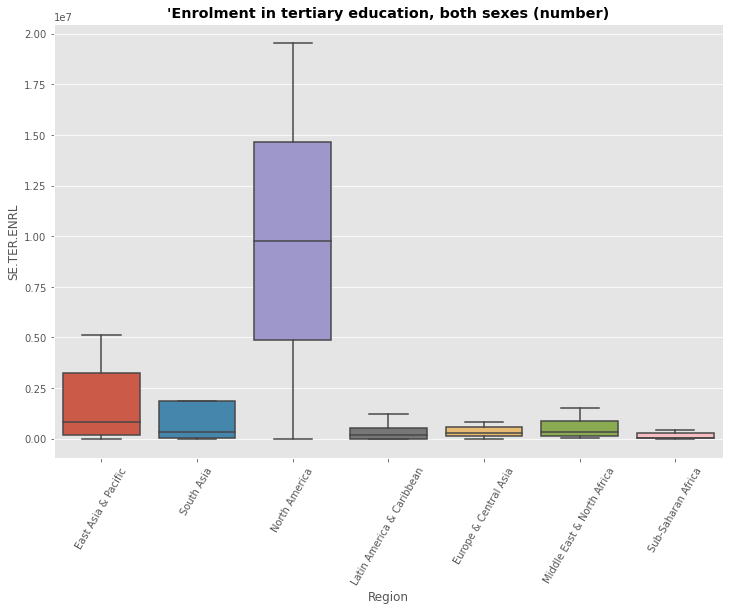

In [135]:
# Boite à moustaches,Enrolment secondary education de chaque pays
sns.boxplot(data=df_it_SE_TER, y='value', x='Region', showfliers=False)
plt.ylabel('SE.TER.ENRL')
plt.xticks(rotation=60)
plt.title("'Enrolment in tertiary education, both sexes (number)")
plt.style.use('ggplot')
plt.show()

In [136]:
fig_se_ter = px.density_heatmap(df_ready_imputer, x='SE.TER.ENRL', y='Region')
fig_se_ter

In [137]:
fig_se_ter_pays = px.density_heatmap(df_ready_imputer, x='SE.TER.ENRL', y='Country Name')
fig_se_ter_pays

**Boite à moustaches sans filtrer les outlier**

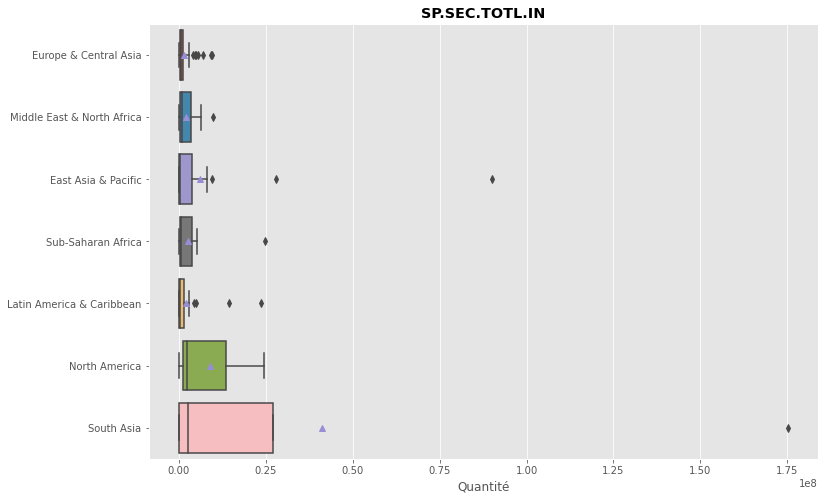

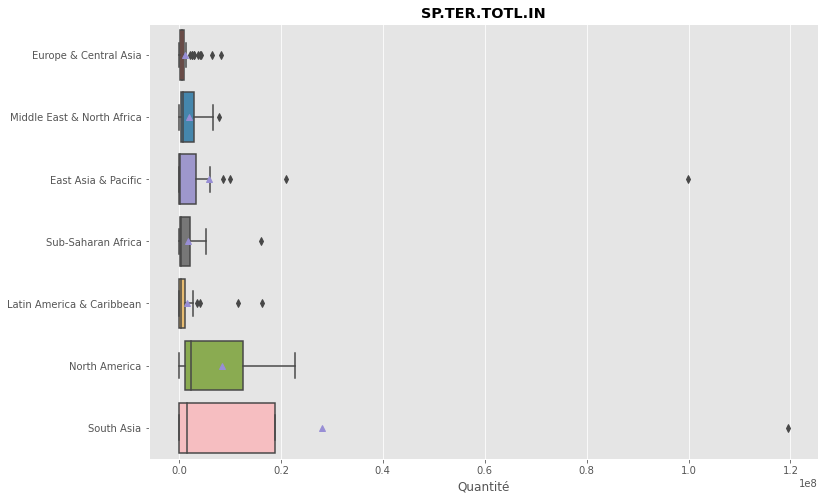

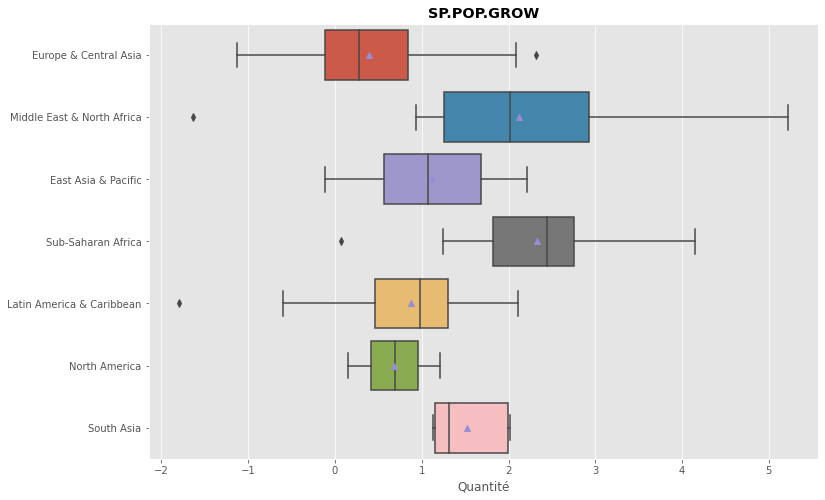

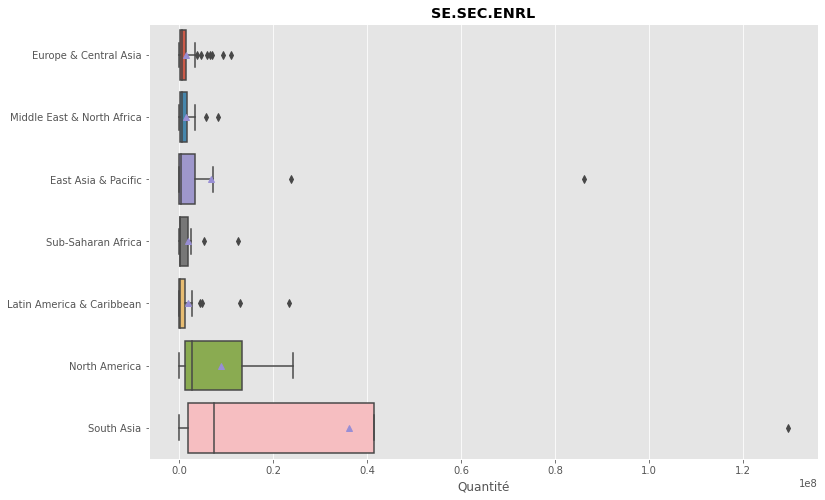

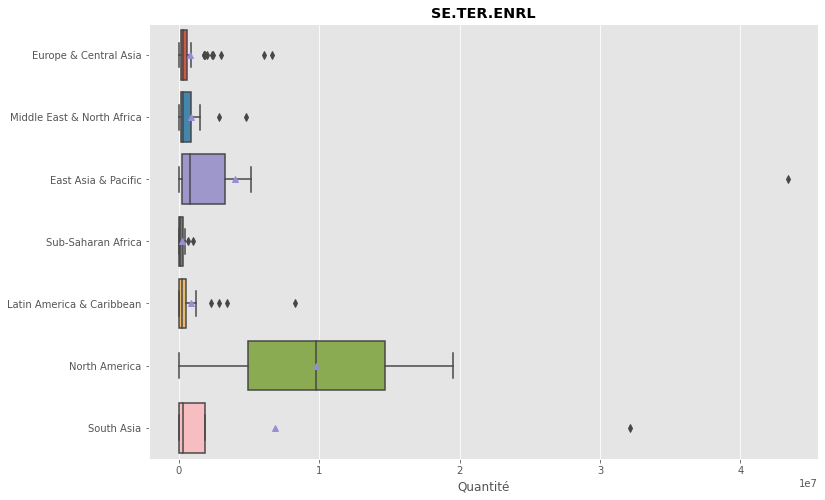

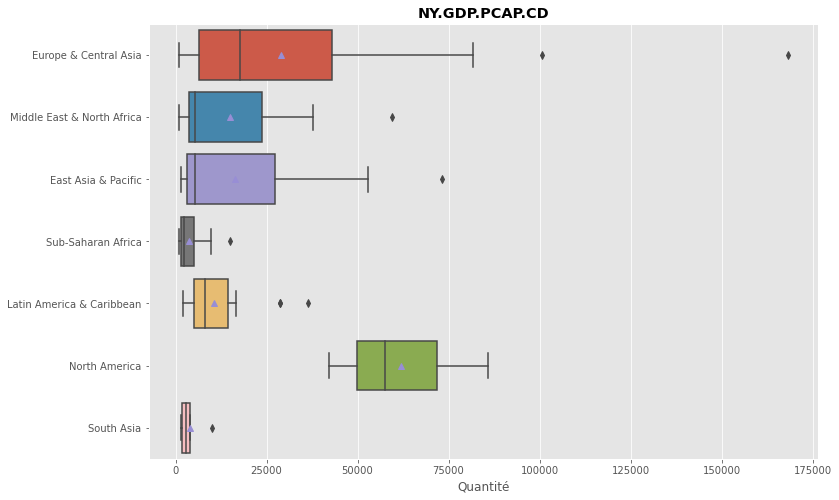

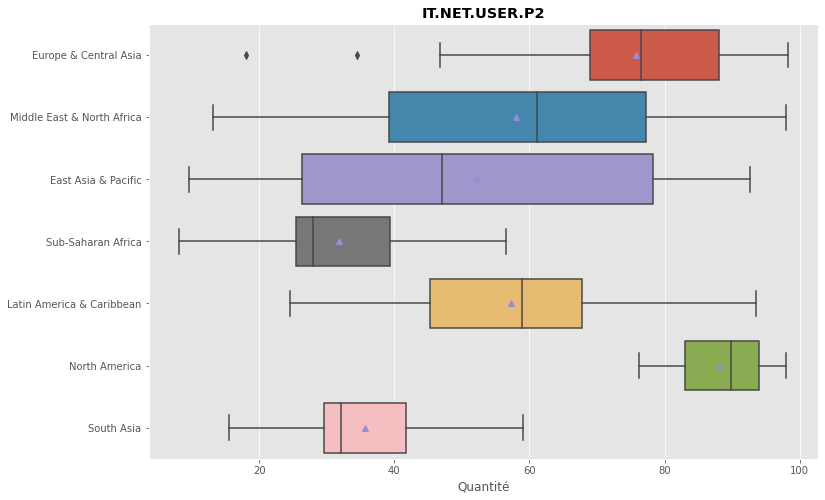

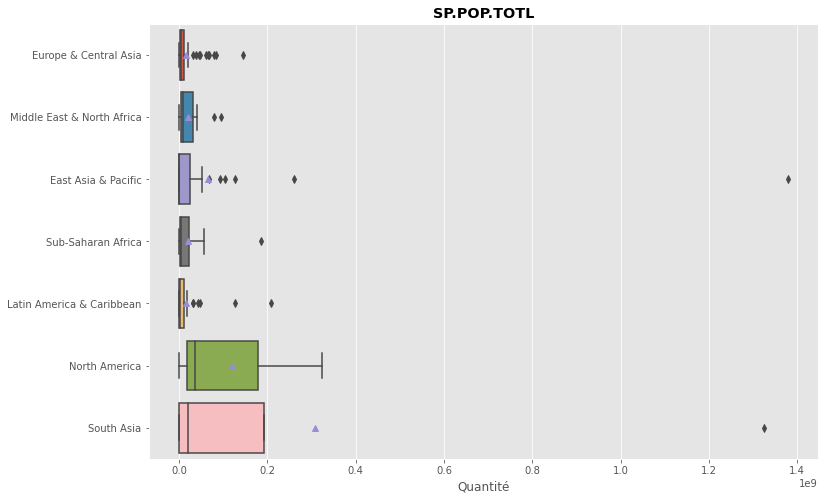

In [138]:
for i, name in zip(new_indic_list, data_academy_notlow['Indicator Name'].unique()) :
    sns.boxplot(data=data_academy_notlow, x=data_academy_notlow[data_academy_notlow['Indicator Code'] == i]['value'], y= 'Region', showmeans=True)
    plt.title(i)
    plt.xlabel('Quantité')
    plt.ylabel('')

    plt.show()

### Corrélation HeatMap

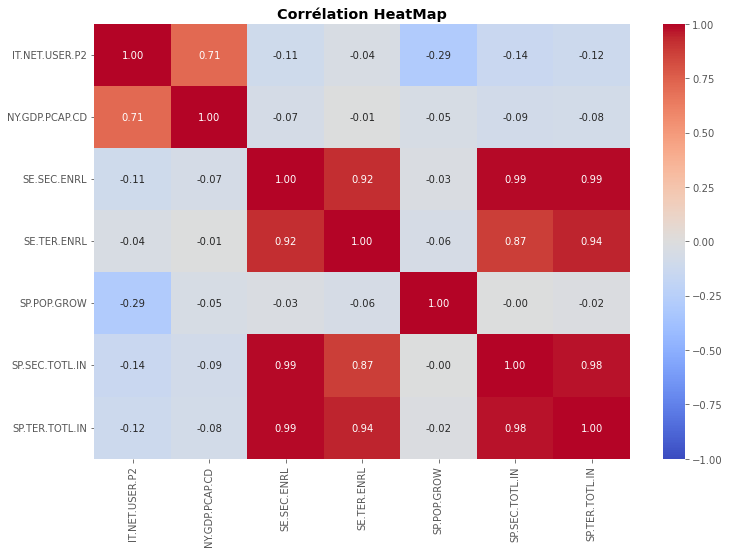

In [139]:
#Pearson linear correlation
sns.heatmap(df_ready_imputer.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin = -1 , vmax = 1)
plt.title('Corrélation HeatMap')
plt.show()

Text(0.5, 1.0, 'Corrélation HeatMap')

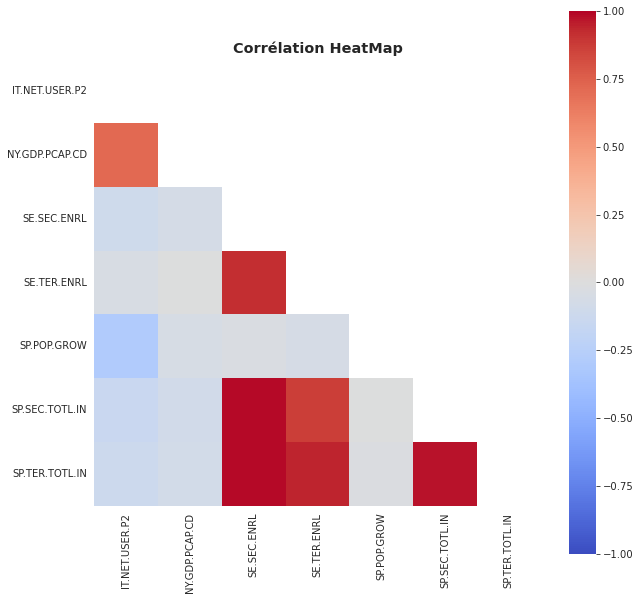

In [140]:
corr = df_ready_imputer.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(corr, mask = mask, vmin = -1 , vmax = 1, cmap='coolwarm', square = True)
plt.title('Corrélation HeatMap')
    

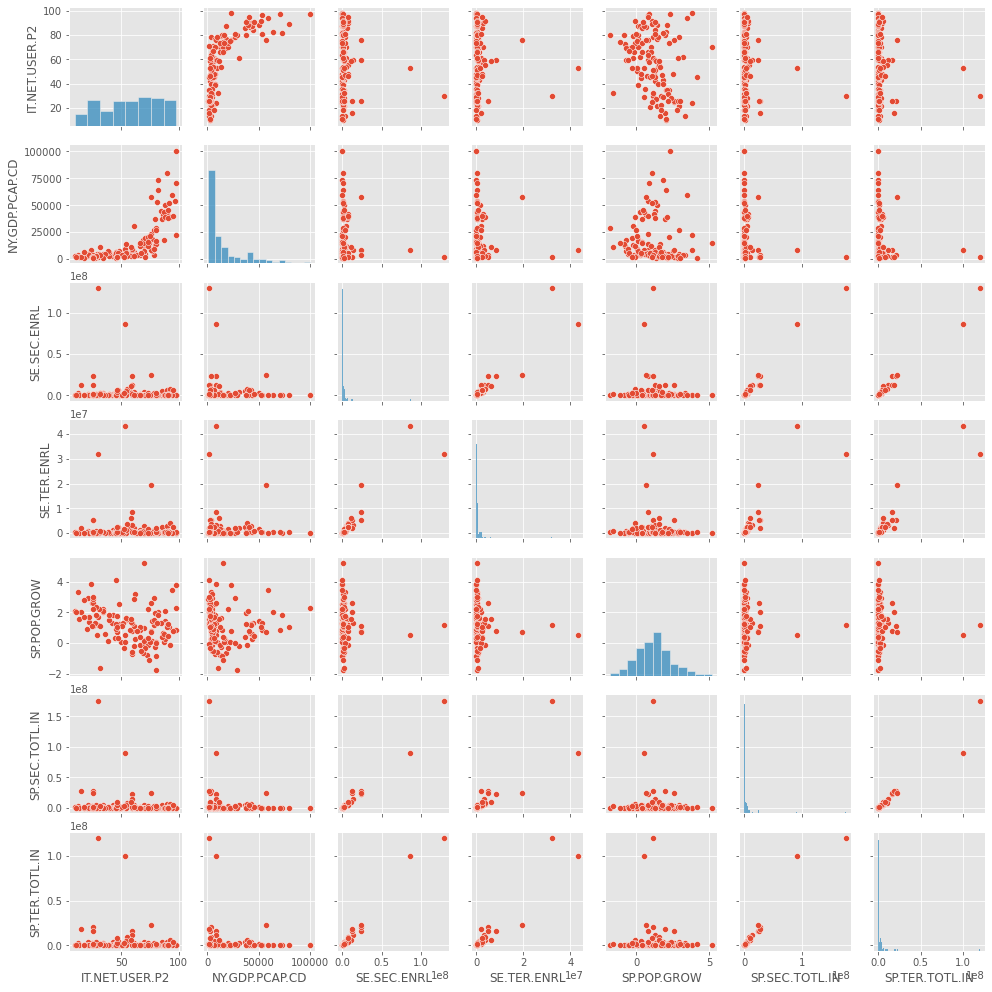

In [141]:
sns.pairplot(df_ready_imputer, height=2)
plt.show()

Il existe effectivement des liens de corrélation linéaire suivant les couples de variables. Par exemple, il ressort clairement qu'au plus le PIB par habitant est élevé, au plus ces mêmes habitants disposent d'un accès à Internet. A priori, cela peut sembler intuitif, mais un cercle des corrélations permettra de grouper plus précisement ces rapports entre variables.

**` PRJ.POP.ALL.4.MF`**


 l'indicateur donne une projection sur l'évolution de la réussite en enseignement supérieur.

In [142]:
country_evolution = data[['Country Name', 'Country Code', 'Indicator Code', '2020', '2025', '2030']]
country_evolution = country_evolution[country_evolution['Indicator Code'] == 'PRJ.POP.ALL.4.MF'].dropna()
country_evolution.reset_index(drop='all', inplace=True)
country_evolution.drop(index=0, inplace=True) #Suppression de l'observation 'World'
country_evolution.drop(columns='Indicator Code', inplace=True)
country_evolution.sort_values('2030', ascending=False, inplace=True)
print("Pays à forte perspective de réussite en enseignement supérieur")
country_evolution

Pays à forte perspective de réussite en enseignement supérieur


Country Name Country Code       2020       2025  \
30                            China          CHN  126496.96  145660.86   
67                            India          IND  103612.78  123654.21   
159                   United States          USA   94645.46  102980.85   
75                            Japan          JPN   44038.31   47389.87   
118                     Philippines          PHL   24478.47   29009.65   
..                              ...          ...        ...        ...   
23                       Cabo Verde          CPV      13.80      15.78   
139  St. Vincent and the Grenadines          VCT      11.84      12.86   
150                           Tonga          TON       9.52      11.03   
161                         Vanuatu          VUT       6.98       8.58   
127           Sao Tome and Principe          STP       1.25       1.49   

          2030  
30   165561.25  
67   145784.61  
159  111600.20  
75    50517.55  
118   33650.46  
..         ...  
23       17.74  
139      13.88  
150      12.70  
161      10.45  
127       1.80  

[166 rows x 5 columns]

Notons que cette liste comparative de pays qui émettent le plus de perspectives d'ici 2030, pourra être utile pour identifier une short liste en fin d'analyse. Il sera pertinent d'affiner la sélection en fonction des clusters identifiés… Pour le moment, visualisons les performances d'ici 2030 non pas sur des observations pays mais via les zones géographiques. Vision moins fine, mais qui permet d'avoir une approche graphique globale par plot.

In [143]:
region_evolution = pd.merge(country_evolution, data_academy_notlow[['Country Name', 'Region']], how='left', on='Country Name')
region_evolution = region_evolution.groupby('Region').sum().reset_index()
print("Zones géographiques à forte perspective de réussite en enseignement supérieur")
#region_evolution.to_csv('forte perspective de réussite en enseignement supérieur.csv')
region_evolution

Zones géographiques à forte perspective de réussite en enseignement supérieur


Region        2020        2025        2030
0         East Asia & Pacific  2106393.63  2412062.20  2724234.93
1       Europe & Central Asia  1305806.91  1411040.11  1525851.67
2   Latin America & Caribbean   560913.49   654334.73   752707.16
3  Middle East & North Africa   384024.94   467946.91   565072.16
4               North America   879343.43   956721.22  1036378.46
5                  South Asia   893978.45  1069652.06  1264263.32
6          Sub-Saharan Africa   160852.18   206561.45   263861.89

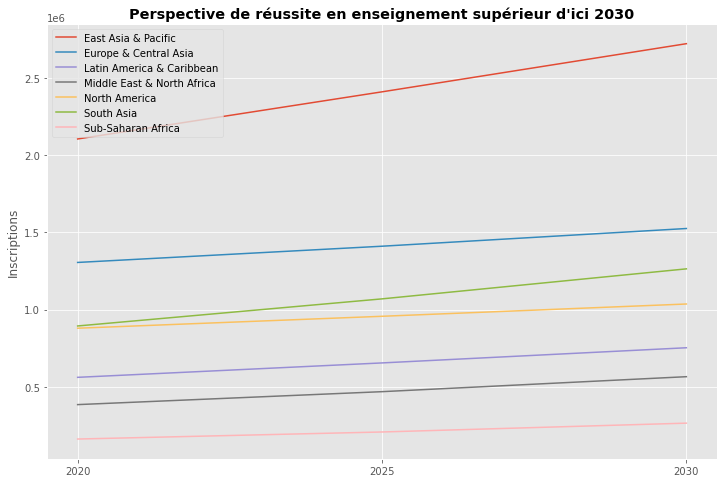

In [144]:
years = np.arange(2020, 2031, 5).astype(str)
for i in region_evolution.itertuples():
    plt.plot(years, region_evolution.loc[i[0],'2020':'2030'], label=region_evolution.loc[i[0],'Region'])

plt.title("Perspective de réussite en enseignement supérieur d'ici 2030")
plt.ylabel('Inscriptions')
plt.legend()
plt.show()

Globalement l'ensemble des territoires devraient s'ouvrir à l'éducation supérieure, le graphique ci-dessus l'atteste par des perspectives en hausse quelque soit le continent, avec une croissance plus marquée pour l'Asie de l'Est et Pacifique.

<a id='21'></a>

**Visualisation sur TABLEAU**

https://public.tableau.com/app/profile/pouria.forouzesh2812

--- 

[Haut de page](#sommaire)

<a id='p4'></a>

## Décisions d'ouverture vers de nouveaux pays

[Haut de page](#sommaire)

Rappelons les objectifs de l'entreprise, l'internationalisation des services de cours en ligne. Un choix de pays cibles devra être fait, l'aide à la décision qui passe par l'étude actuelle repose sur des hypothèses que nous poserons prochainement. La classification des pays par l'algortithme k-means semble être le bon choix de modélisation, en effet le k-means permet de rechercher efficacement une partition des données dont la variance intra-cluster est minimale.

In [145]:
Y = df_ready_imputer.iloc[:, 2:].values

In [146]:
std_scale = preprocessing.StandardScaler().fit(Y)
Y_scaled = std_scale.transform(Y)

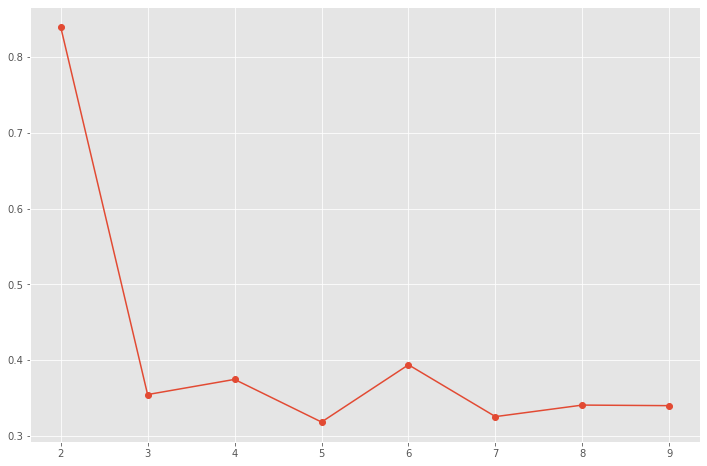

In [147]:
silhouettes = [] 

for k in range(2, 10):
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(Y_scaled)
    
    silh = metrics.silhouette_score(Y_scaled, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

<a id='14'></a>
**PCA**

[Haut de page](#sommaire)

In [148]:
pca = decomposition.PCA(n_components=4)
pca.fit(Y_scaled)

PCA(n_components=4)

In [149]:
pc = pca.components_
pc 

array([[-0.08771754, -0.06510616,  0.50456311,  0.4797811 , -0.00965069,
         0.497062  ,  0.50609211],
       [ 0.68941227,  0.64377242,  0.04751926,  0.10237283, -0.30985777,
         0.01746015,  0.03482561],
       [ 0.04908808,  0.38577702,  0.01641213,  0.00930488,  0.92036151,
         0.03013716,  0.02090365],
       [ 0.71468971, -0.6570574 ,  0.01663443,  0.0240953 ,  0.23680326,
        -0.01453186,  0.01870667]])

In [150]:
pd.DataFrame(pc, columns=['IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 
                          'SE.SEC.ENRL', 'SE.TER.ENRL', 'SP.POP.GROW',
                          'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN']).T

0         1         2         3
IT.NET.USER.P2 -0.087718  0.689412  0.049088  0.714690
NY.GDP.PCAP.CD -0.065106  0.643772  0.385777 -0.657057
SE.SEC.ENRL     0.504563  0.047519  0.016412  0.016634
SE.TER.ENRL     0.479781  0.102373  0.009305  0.024095
SP.POP.GROW    -0.009651 -0.309858  0.920362  0.236803
SP.SEC.TOTL.IN  0.497062  0.017460  0.030137 -0.014532
SP.TER.TOTL.IN  0.506092  0.034826  0.020904  0.018707

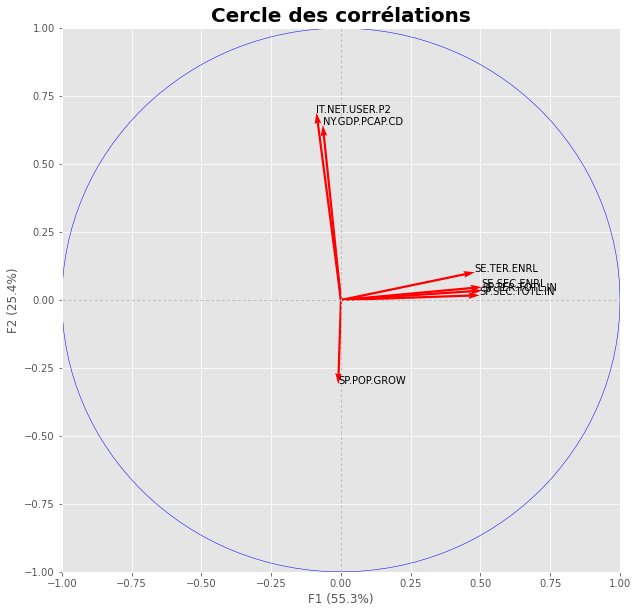

In [151]:
#Cercle des corrélations
fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pc.shape[1]), np.zeros(pc.shape[1]),
           pc[0,:], pc[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.004)

for i, (x, y) in enumerate(zip(pc[0, :], pc[1, :])):
    plt.text(x, y, df_ready_imputer.iloc[:, 2:].columns[i], fontsize=10)
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

In [152]:
print(pca.explained_variance_ratio_.cumsum())

[0.55313037 0.80667794 0.94421964 0.97885722]


<AxesSubplot:>

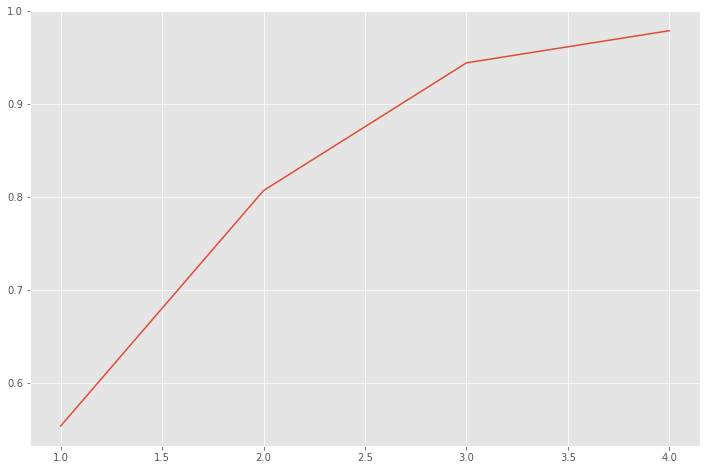

In [153]:
sns.lineplot(x=range(1, 5), y = pca.explained_variance_ratio_.cumsum(),  )

Notons que  80% de la variance expliquée se retrouve dans les deux premières composantes principales.

<a id='15'></a>
**Clustering k-means**

[Haut de page](#sommaire)

In [154]:
#Kmeans clustering
cls = cluster.KMeans(n_clusters=4, init="random",  
                    n_init=10, max_iter=300, random_state=42)
cls.fit(Y_scaled)

KMeans(init='random', n_clusters=4, random_state=42)

In [155]:
#Labels
clusters_kmeans = cls.labels_

In [156]:
df_ready_imputer_cls = df_ready_imputer.copy() 
df_ready_imputer_cls['Clusters'] = clusters_kmeans
df_ready_imputer_cls.head(3)

Country Name                      Region  IT.NET.USER.P2  NY.GDP.PCAP.CD  \
0      Albania       Europe & Central Asia       66.363445     4124.982390   
1      Algeria  Middle East & North Africa       42.945527     3916.881571   
2       Angola          Sub-Saharan Africa       13.000000     3308.700233   

   SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0     315079.0     160527.0    -0.159880        311514.0        276247.0   
1    2256027.0    1289474.0     1.825463       4056674.0       3492401.0   
2    2751494.0     221037.0     3.367572       3691322.0       2374694.0   

   Clusters  
0         0  
1         1  
2         1

In [157]:
X_projected = pca.transform(Y_scaled)

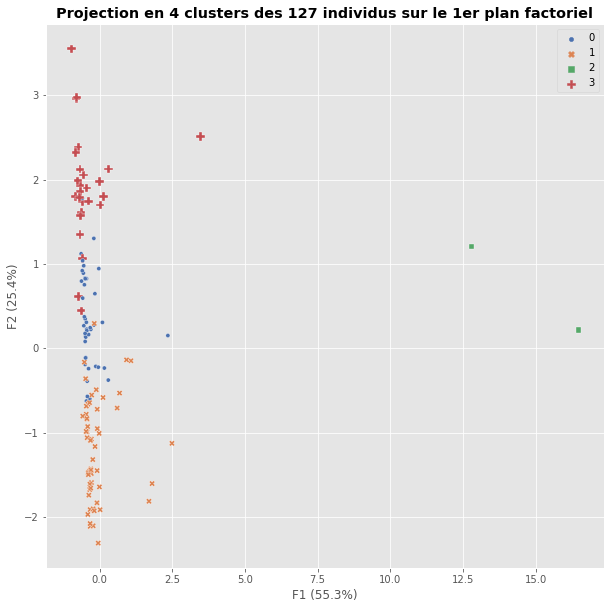

In [158]:
plt.figure(figsize=(10, 10))

# label = df_ready_imputer.Clusters.unique()
#plt.scatter(X_projected[:, 1], X_projected[:, 2], c=cls.labels_ )
sns.scatterplot(x=X_projected[:, 0], y=X_projected[:, 1], hue=df_ready_imputer_cls.Clusters, 
                style=df_ready_imputer_cls.Clusters, palette="deep", size=df_ready_imputer_cls.Clusters)


plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.legend()
plt.show()

In [159]:
# plt.figure(figsize=(10, 10))

# # label = df_ready_imputer.Clusters.unique()
# #plt.scatter(X_projected[:, 1], X_projected[:, 2], c=cls.labels_ )
# sns.scatterplot(x=X_projected[:, 1], y=X_projected[:, 2], hue=df_ready_imputer_cls.Clusters, 
#                 style=df_ready_imputer_cls.Clusters, palette="deep", size=df_ready_imputer_cls.Clusters)


# plt.xlabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
# plt.ylabel('F{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
# plt.title("Projection en 4 clusters des {} individus sur le 2eme plan factoriel".format(X_projected.shape[1]))
# plt.legend()
# plt.show()

In [160]:
columns =df_ready_imputer_cls.iloc[:,2:-1].columns

In [161]:
centroids = cls.cluster_centers_
pd.DataFrame(centroids, index=['cluster0', 'cluster1', 'cluster2', 'cluster3'],columns=columns )

IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  \
cluster0        0.346775       -0.240479    -0.157534    -0.146794   
cluster1       -0.850636       -0.601604    -0.097421    -0.142051   
cluster2       -0.687010       -0.572011     7.385028     7.121538   
cluster3        1.265420        1.723590    -0.095400     0.001101   

          SP.POP.GROW  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  
cluster0    -0.918792       -0.168330       -0.174677  
cluster1     0.667810       -0.065174       -0.076554  
cluster2    -0.281898        7.183866        7.553036  
cluster3     0.163887       -0.129870       -0.123453

In [162]:
print(str(len(df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 0]['Country Name'])) + " pays dans le cluster 0")
print(str(len(df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 1]['Country Name'])) + " pays dans le cluster 1")
print(str(len(df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 2]['Country Name'])) + " pays dans le cluster 2")
print(str(len(df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 3]['Country Name'])) + " pays dans le cluster 3")

44 pays dans le cluster 0
55 pays dans le cluster 1
2 pays dans le cluster 2
26 pays dans le cluster 3


In [163]:
df_Y_scaled_col = df_ready_imputer.columns[2:]

In [164]:
df_Y_scaled = pd.DataFrame(Y_scaled, columns = df_Y_scaled_col )
df_Y_scaled.head()

IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  \
0        0.349539       -0.612415    -0.254510    -0.262320    -1.128435   
1       -0.621808       -0.623039    -0.116601    -0.040482     0.544325   
2       -1.863912       -0.654089    -0.081397    -0.250430     1.843635   
3        0.506633       -0.187893     0.039339     0.269983    -0.164029   
4        0.168549       -0.638467    -0.259824    -0.272708    -0.766825   

   SP.SEC.TOTL.IN  SP.TER.TOTL.IN  
0       -0.244339       -0.248731  
1       -0.034061       -0.019438  
2       -0.054575       -0.099124  
3       -0.023590       -0.022417  
4       -0.247327       -0.251103

In [165]:
#Verifier ligne de Albania
-0.685606 + 0.349539+-0.609191+-0.254248+-0.255359+-1.128435+-0.244354+-0.248545

-3.0761990000000003

In [166]:
plus = np.sum(df_Y_scaled,axis=1)
df_ready_imputer_cls['potentiel'] = plus
df_ready_imputer_cls.head(3)

Country Name                      Region  IT.NET.USER.P2  NY.GDP.PCAP.CD  \
0      Albania       Europe & Central Asia       66.363445     4124.982390   
1      Algeria  Middle East & North Africa       42.945527     3916.881571   
2       Angola          Sub-Saharan Africa       13.000000     3308.700233   

   SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0     315079.0     160527.0    -0.159880        311514.0        276247.0   
1    2256027.0    1289474.0     1.825463       4056674.0       3492401.0   
2    2751494.0     221037.0     3.367572       3691322.0       2374694.0   

   Clusters  potentiel  
0         0  -2.401212  
1         1  -0.911105  
2         1  -1.159892

In [167]:
df_ready_imputer_c0 = df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 0].sort_values(by='potentiel', ascending=False)
df_ready_imputer_c0['rank'] = df_ready_imputer_c0['potentiel'].rank(ascending=False)

df_ready_imputer_c0[['Country Name', 'Region', 'Clusters', 'potentiel', 'rank']].head(10)

Country Name                     Region  Clusters  potentiel  rank
15        Brazil  Latin America & Caribbean         0   4.074534   1.0
69      Malaysia        East Asia & Pacific         0   0.509074   2.0
3      Argentina  Latin America & Caribbean         0   0.418026   3.0
104        Spain      Europe & Central Asia         0   0.297143   4.0
57    Kazakhstan      Europe & Central Asia         0  -0.109406   5.0
53         Italy      Europe & Central Asia         0  -0.245778   6.0
26        Cyprus      Europe & Central Asia         0  -0.302161   7.0
22      Colombia  Latin America & Caribbean         0  -0.515489   8.0
20         Chile  Latin America & Caribbean         0  -0.649917   9.0
7     Azerbaijan      Europe & Central Asia         0  -0.694803  10.0

In [168]:
df_ready_imputer_c1 = df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 1].sort_values(by='potentiel', ascending=False)
df_ready_imputer_c1['rank'] = df_ready_imputer_c1['potentiel'].rank(ascending=False)

df_ready_imputer_c1[['Country Name', 'Region', 'Clusters', 'potentiel', 'rank']].head(5)

Country Name                      Region  Clusters  potentiel  rank
83          Oman  Middle East & North Africa         1   2.814348   1.0
49     Indonesia         East Asia & Pacific         1   2.633396   2.0
81       Nigeria          Sub-Saharan Africa         1   2.484897   3.0
116       Turkey       Europe & Central Asia         1   1.934750   4.0
72        Mexico   Latin America & Caribbean         1   1.885689   5.0

In [169]:
df_ready_imputer_c2 = df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 2].sort_values(by='potentiel', ascending=False)
df_ready_imputer_c2['rank'] = df_ready_imputer_c2['potentiel'].rank(ascending=False)

df_ready_imputer_c2[['Country Name', 'Region', 'Clusters', 'potentiel', 'rank']]

Country Name               Region  Clusters  potentiel  rank
48        India           South Asia         2  30.823258   1.0
21        China  East Asia & Pacific         2  24.581840   2.0

In [170]:
df_ready_imputer_c3 = df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 3].sort_values(by='potentiel', ascending=False)
df_ready_imputer_c3['rank'] = df_ready_imputer_c3['potentiel'].rank(ascending=False)

df_ready_imputer_c3[['Country Name', 'Region', 'Clusters', 'potentiel', 'rank']].head(27)

Country Name                      Region  Clusters  potentiel  \
121         United States               North America         3   9.926093   
67             Luxembourg       Europe & Central Asia         3   5.824735   
93                  Qatar  Middle East & North Africa         3   4.595495   
110           Switzerland       Europe & Central Asia         3   3.545182   
68       Macao SAR, China         East Asia & Pacific         3   3.373974   
40                Germany       Europe & Central Asia         3   3.335278   
82                 Norway       Europe & Central Asia         3   3.181987   
51                Ireland       Europe & Central Asia         3   3.165947   
8                 Bahrain  Middle East & North Africa         3   3.134955   
120        United Kingdom       Europe & Central Asia         3   2.828668   
5               Australia         East Asia & Pacific         3   2.741624   
55                  Japan         East Asia & Pacific         3   2.481463   
19                 Canada               North America         3   2.333117   
28                Denmark       Europe & Central Asia         3   2.289714   
79            New Zealand         East Asia & Pacific         3   2.255008   
109                Sweden       Europe & Central Asia         3   2.242204   
98              Singapore         East Asia & Pacific         3   1.972479   
37                 France       Europe & Central Asia         3   1.920532   
59                 Kuwait  Middle East & North Africa         3   1.860772   
6                 Austria       Europe & Central Asia         3   1.772982   
52                 Israel  Middle East & North Africa         3   1.762819   
78            Netherlands       Europe & Central Asia         3   1.570016   
119  United Arab Emirates  Middle East & North Africa         3   1.569251   
10                Belgium       Europe & Central Asia         3   1.198472   
46   Hong Kong SAR, China         East Asia & Pacific         3   1.140192   
36                Finland       Europe & Central Asia         3   0.914200   

     rank  
121   1.0  
67    2.0  
93    3.0  
110   4.0  
68    5.0  
40    6.0  
82    7.0  
51    8.0  
8     9.0  
120  10.0  
5    11.0  
55   12.0  
19   13.0  
28   14.0  
79   15.0  
109  16.0  
98   17.0  
37   18.0  
59   19.0  
6    20.0  
52   21.0  
78   22.0  
119  23.0  
10   24.0  
46   25.0  
36   26.0

**MinMaxScaler**

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
Y = df_ready_imputer.iloc[:, 2:].values

In [173]:
scaler = MinMaxScaler()
minmax_scale = scaler.fit(Y)
Y_minmaxscaled = minmax_scale.transform(Y)

In [174]:
df_Y_scaled_col = df_ready_imputer.columns[2:]

In [175]:
df_Y_minmaxscaled = pd.DataFrame(Y_minmaxscaled, columns = df_Y_scaled_col )
df_Y_minmaxscaled.head()

IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  \
0        0.642114        0.031843     0.002200     0.003516     0.233442   
1        0.377201        0.029754     0.017187     0.029553     0.516446   
2        0.038445        0.023649     0.021013     0.004912     0.736268   
3        0.684958        0.115313     0.034133     0.065993     0.396604   
4        0.592753        0.026721     0.001623     0.002297     0.294621   

   SP.SEC.TOTL.IN  SP.TER.TOTL.IN  
0        0.001614        0.002027  
1        0.023002        0.028955  
2        0.020916        0.019597  
3        0.024067        0.028605  
4        0.001310        0.001749

In [176]:
plus_minmax = np.sum(df_Y_minmaxscaled,axis=1)
df_ready_imputer_cls['potentiel_minmax'] = plus_minmax
df_ready_imputer_cls.head(3)

Country Name                      Region  IT.NET.USER.P2  NY.GDP.PCAP.CD  \
0      Albania       Europe & Central Asia       66.363445     4124.982390   
1      Algeria  Middle East & North Africa       42.945527     3916.881571   
2       Angola          Sub-Saharan Africa       13.000000     3308.700233   

   SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0     315079.0     160527.0    -0.159880        311514.0        276247.0   
1    2256027.0    1289474.0     1.825463       4056674.0       3492401.0   
2    2751494.0     221037.0     3.367572       3691322.0       2374694.0   

   Clusters  potentiel  potentiel_minmax  
0         0  -2.401212          0.916758  
1         1  -0.911105          1.022099  
2         1  -1.159892          0.864799

In [177]:
df_ready_imputer_c3_minmax = df_ready_imputer_cls[df_ready_imputer_cls['Clusters'] == 3].sort_values(by='potentiel_minmax', ascending=False)
df_ready_imputer_c3_minmax['rank'] = df_ready_imputer_c3_minmax['potentiel_minmax'].rank(ascending=False)

df_ready_imputer_c3_minmax[['Country Name', 'Region', 'Clusters', 'potentiel_minmax', 'rank']].head(27)

Country Name                      Region  Clusters  \
121         United States               North America         3   
67             Luxembourg       Europe & Central Asia         3   
93                  Qatar  Middle East & North Africa         3   
110           Switzerland       Europe & Central Asia         3   
82                 Norway       Europe & Central Asia         3   
68       Macao SAR, China         East Asia & Pacific         3   
8                 Bahrain  Middle East & North Africa         3   
51                Ireland       Europe & Central Asia         3   
40                Germany       Europe & Central Asia         3   
5               Australia         East Asia & Pacific         3   
28                Denmark       Europe & Central Asia         3   
120        United Kingdom       Europe & Central Asia         3   
109                Sweden       Europe & Central Asia         3   
79            New Zealand         East Asia & Pacific         3   
19                 Canada               North America         3   
55                  Japan         East Asia & Pacific         3   
98              Singapore         East Asia & Pacific         3   
6                 Austria       Europe & Central Asia         3   
119  United Arab Emirates  Middle East & North Africa         3   
78            Netherlands       Europe & Central Asia         3   
59                 Kuwait  Middle East & North Africa         3   
52                 Israel  Middle East & North Africa         3   
37                 France       Europe & Central Asia         3   
46   Hong Kong SAR, China         East Asia & Pacific         3   
10                Belgium       Europe & Central Asia         3   
36                Finland       Europe & Central Asia         3   

     potentiel_minmax  rank  
121          2.644613   1.0  
67           2.581725   2.0  
93           2.301143   3.0  
110          2.123293   4.0  
82           2.085600   5.0  
68           2.060675   6.0  
8            2.018832   7.0  
51           2.009649   8.0  
40           1.942818   9.0  
5            1.912682  10.0  
28           1.907698  11.0  
120          1.893211  12.0  
109          1.869749  13.0  
79           1.846469  14.0  
19           1.834325  15.0  
55           1.787609  16.0  
98           1.785427  17.0  
6            1.750277  18.0  
119          1.735722  19.0  
78           1.731500  20.0  
59           1.723011  21.0  
52           1.718087  22.0  
37           1.697279  23.0  
46           1.658691  24.0  
10           1.653876  25.0  
36           1.621511  26.0

In [178]:
px.bar(df_ready_imputer_c3_minmax, x='Country Name', y='potentiel_minmax')

<a id='16'></a>

### DataFrame dataframe modifié (sans Chine et Inde)

[Haut de page](#sommaire)

In [179]:
df_ready_imputer_sans_chine_inde = df_ready_imputer[(df_ready_imputer['Country Name'] != 'India') & (df_ready_imputer['Country Name'] != 'China') ]
#df_ready_imputer_sans_chine_inde.to_csv('df.csv')
df_ready_imputer_sans_chine_inde

Country Name                      Region  IT.NET.USER.P2  \
0               Albania       Europe & Central Asia       66.363445   
1               Algeria  Middle East & North Africa       42.945527   
2                Angola          Sub-Saharan Africa       13.000000   
3             Argentina   Latin America & Caribbean       70.150764   
4               Armenia       Europe & Central Asia       62.000000   
..                  ...                         ...             ...   
122             Uruguay   Latin America & Caribbean       66.400000   
123          Uzbekistan       Europe & Central Asia       46.791287   
124             Vietnam         East Asia & Pacific       46.500000   
125  West Bank and Gaza  Middle East & North Africa       61.178385   
126              Zambia          Sub-Saharan Africa       25.506579   

     NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  \
0       4124.982390    315079.00     160527.0    -0.159880        311514.0   
1       3916.881571   2256027.00    1289474.0     1.825463       4056674.0   
2       3308.700233   2751494.00     221037.0     3.367572       3691322.0   
3      12440.320982   4450741.00    2869450.0     0.984742       4243169.0   
4       3614.688357    240291.00     107665.0     0.269302        258301.0   
..              ...          ...          ...          ...             ...   
122    15220.566025    291805.00     145787.0     0.362269        301869.0   
123     2110.647872   3908744.00     265679.0     1.739791       4074837.0   
124     2214.387662   7166669.25    2466643.0     1.071293       9377680.0   
125     2943.404534    721414.00     221018.0     2.884693        869213.0   
126     1269.573537   1576502.50     476389.5     3.002816       1882524.0   

     SP.TER.TOTL.IN  
0          276247.0  
1         3492401.0  
2         2374694.0  
3         3450626.0  
4          242984.0  
..              ...  
122        262366.0  
123       2921796.0  
124       8554144.0  
125        499101.0  
126       1497656.0  

[125 rows x 9 columns]

In [180]:
#Check
df_ready_imputer_sans_chine_inde[df_ready_imputer_sans_chine_inde['Country Name'] == 'India']

Empty DataFrame
Columns: [Country Name, Region, IT.NET.USER.P2, NY.GDP.PCAP.CD, SE.SEC.ENRL, SE.TER.ENRL, SP.POP.GROW, SP.SEC.TOTL.IN, SP.TER.TOTL.IN]
Index: []

In [181]:
df_ready_imputer_sans_chine_inde[df_ready_imputer_sans_chine_inde['Country Name'] == 'China']

Empty DataFrame
Columns: [Country Name, Region, IT.NET.USER.P2, NY.GDP.PCAP.CD, SE.SEC.ENRL, SE.TER.ENRL, SP.POP.GROW, SP.SEC.TOTL.IN, SP.TER.TOTL.IN]
Index: []

In [182]:
Y2 = df_ready_imputer_sans_chine_inde.iloc[:, 2:].values

In [183]:
#minmax scaler
std_scale_2 = scaler.fit(Y2)
Y_scaled_2 = std_scale_2.transform(Y2)

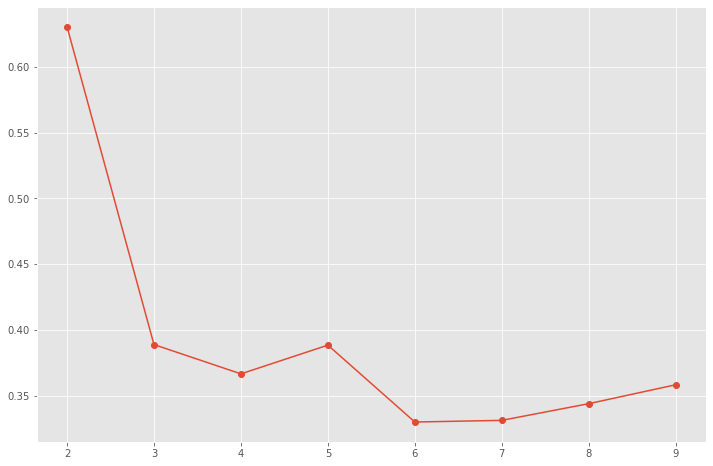

In [184]:
silhouettes = [] 

for k in range(2, 10):
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(Y_scaled_2)
    
    silh = metrics.silhouette_score(Y_scaled_2, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

<a id='17'></a>

**PCA**

In [185]:
pca1 = decomposition.PCA(n_components=4)
pca1.fit(Y_scaled_2)

PCA(n_components=4)

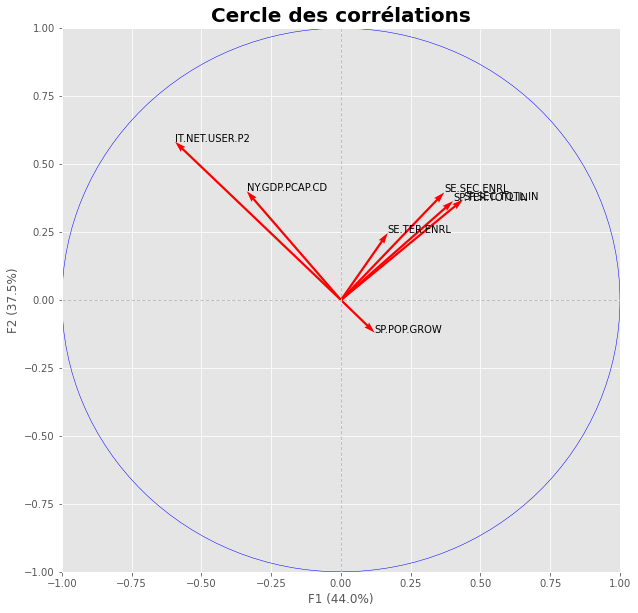

In [186]:
pc1 = pca1.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pc1.shape[1]), np.zeros(pc1.shape[1]),
           pc1[0,:], pc1[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.004)

for i, (x, y) in enumerate(zip(pc1[0, :], pc1[1, :])):
    plt.text(x, y, df_ready_imputer_sans_chine_inde.iloc[:, 2:].columns[i], fontsize=10)
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca1.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca1.explained_variance_ratio_[1],1)))

plt.show()

<a id='18'></a>

**Clustering k-means**

In [187]:
#Kmeans clustering
cls1 = cluster.KMeans(n_clusters=5,  init="random",  
                    n_init=10, max_iter=300, random_state=42)
cls1.fit(Y_scaled_2)

KMeans(init='random', n_clusters=5, random_state=42)

In [188]:
#Labels
clusters_kmeans_2 = cls1.labels_

In [189]:
df_ready_imputer_cls1 = df_ready_imputer_sans_chine_inde.copy() 
df_ready_imputer_cls1['Clusters'] = clusters_kmeans_2
df_ready_imputer_cls1.head(3)

Country Name                      Region  IT.NET.USER.P2  NY.GDP.PCAP.CD  \
0      Albania       Europe & Central Asia       66.363445     4124.982390   
1      Algeria  Middle East & North Africa       42.945527     3916.881571   
2       Angola          Sub-Saharan Africa       13.000000     3308.700233   

   SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0     315079.0     160527.0    -0.159880        311514.0        276247.0   
1    2256027.0    1289474.0     1.825463       4056674.0       3492401.0   
2    2751494.0     221037.0     3.367572       3691322.0       2374694.0   

   Clusters  
0         1  
1         2  
2         2

In [190]:
df_Y_scaled_2 = pd.DataFrame(Y_scaled_2, columns = df_Y_scaled_col )
df_Y_scaled_2.head()

IT.NET.USER.P2  NY.GDP.PCAP.CD  SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  \
0        0.642114        0.031843     0.011777     0.007809     0.233442   
1        0.377201        0.029754     0.091982     0.065634     0.516446   
2        0.038445        0.023649     0.112456     0.010909     0.736268   
3        0.684958        0.115313     0.182674     0.146560     0.396604   
4        0.592753        0.026721     0.008686     0.005102     0.294621   

   SP.SEC.TOTL.IN  SP.TER.TOTL.IN  
0        0.010126        0.010652  
1        0.144341        0.152138  
2        0.131248        0.102967  
3        0.151024        0.150300  
4        0.008219        0.009189

In [191]:
plus_2 = np.sum(df_Y_scaled_2,axis=1)
df_ready_imputer_cls1['potentiel_2'] = plus_2
#df_ready_imputer_cls1.to_csv('df_cls_pot.csv')
df_ready_imputer_cls1.head(3)

Country Name                      Region  IT.NET.USER.P2  NY.GDP.PCAP.CD  \
0      Albania       Europe & Central Asia       66.363445     4124.982390   
1      Algeria  Middle East & North Africa       42.945527     3916.881571   
2       Angola          Sub-Saharan Africa       13.000000     3308.700233   

   SE.SEC.ENRL  SE.TER.ENRL  SP.POP.GROW  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  \
0     315079.0     160527.0    -0.159880        311514.0        276247.0   
1    2256027.0    1289474.0     1.825463       4056674.0       3492401.0   
2    2751494.0     221037.0     3.367572       3691322.0       2374694.0   

   Clusters  potentiel_2  
0         1     0.947764  
1         2     1.377496  
2         2     1.155942

In [192]:
X_projected_2 = pca1.transform(Y_scaled_2)

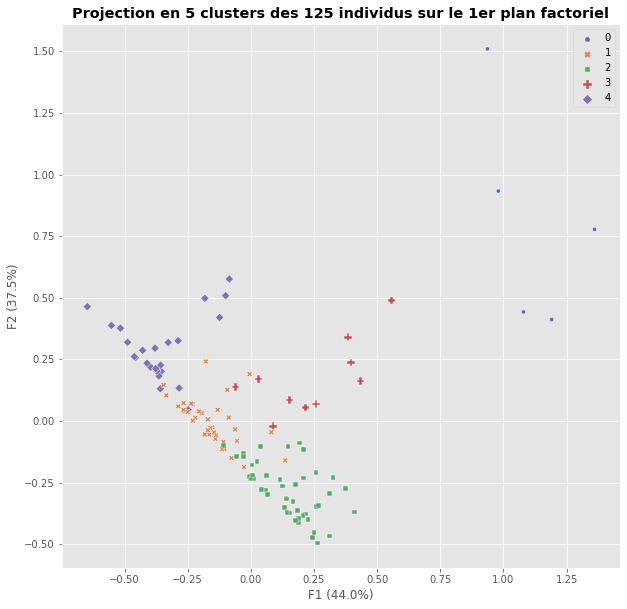

In [193]:
plt.figure(figsize=(10, 10))

# label = df_ready_imputer.Clusters.unique()
#plt.scatter(X_projected[:, 1], X_projected[:, 2], c=cls.labels_ )
sns.scatterplot(x=X_projected_2[:, 0], y=X_projected_2[:, 1], hue=df_ready_imputer_cls1.Clusters, 
                style=df_ready_imputer_cls1.Clusters, palette="deep", size=df_ready_imputer_cls1.Clusters)


plt.xlabel('F{} ({}%)'.format(1, round(100*pca1.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca1.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected_2.shape[0]))
plt.legend()
plt.show()

In [194]:
#Plotly
fig2 = px.scatter(X_projected_2,x=X_projected_2[:, 0], y=X_projected_2[:, 1], color=df_ready_imputer_cls1.Clusters )
fig2.show()

In [195]:
print(str(len(df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 0]['Country Name'])) + " pays dans le cluster 0")
print(str(len(df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 1]['Country Name'])) + " pays dans le cluster 1")
print(str(len(df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 2]['Country Name'])) + " pays dans le cluster 2")
print(str(len(df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 3]['Country Name'])) + " pays dans le cluster 3")
print(str(len(df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 4]['Country Name'])) + " pays dans le cluster 4")

5 pays dans le cluster 0
38 pays dans le cluster 1
47 pays dans le cluster 2
10 pays dans le cluster 3
25 pays dans le cluster 4


In [196]:
df_ready_imputer_c0_new = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 0].sort_values(by='potentiel_2', ascending=False)
df_ready_imputer_c0_new['rank'] = df_ready_imputer_c0_new['potentiel_2'].rank(ascending=False)

df_ready_imputer_c0_new[['Country Name', 'Region', 'Clusters', 'potentiel_2', 'rank']].head(6)

Country Name                     Region  Clusters  potentiel_2  rank
15          Brazil  Latin America & Caribbean         0     3.973385   1.0
49       Indonesia        East Asia & Pacific         0     2.041991   2.0
81         Nigeria         Sub-Saharan Africa         0     1.856816   3.0
121  United States              North America         0     1.382062   4.0
84        Pakistan                 South Asia         0     0.674992   5.0

In [197]:
df_ready_imputer_c1_new = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 1].sort_values(by='potentiel_2', ascending=False)
df_ready_imputer_c1_new['rank'] = df_ready_imputer_c1_new['potentiel_2'].rank(ascending=False)

df_ready_imputer_c1_new[['Country Name', 'Region', 'Clusters', 'potentiel_2', 'rank']].head(10)

Country Name                     Region  Clusters  potentiel_2  \
47               Hungary      Europe & Central Asia         1     3.789605   
39               Georgia      Europe & Central Asia         1     2.622964   
53                 Italy      Europe & Central Asia         1     2.562467   
114  Trinidad and Tobago  Latin America & Caribbean         1     2.509876   
118              Ukraine      Europe & Central Asia         1     2.474257   
91              Portugal      Europe & Central Asia         1     2.311808   
66             Lithuania      Europe & Central Asia         1     2.061550   
122              Uruguay  Latin America & Caribbean         1     1.969694   
27        Czech Republic      Europe & Central Asia         1     1.957861   
57            Kazakhstan      Europe & Central Asia         1     1.749967   

     rank  
47    1.0  
39    2.0  
53    3.0  
114   4.0  
118   5.0  
91    6.0  
66    7.0  
122   8.0  
27    9.0  
57   10.0

In [198]:
df_ready_imputer_c2_new = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 2].sort_values(by='potentiel_2', ascending=False)
df_ready_imputer_c2_new['rank'] = df_ready_imputer_c2_new['potentiel_2'].rank(ascending=False)

df_ready_imputer_c2_new[['Country Name', 'Region', 'Clusters', 'potentiel_2', 'rank']].head(10)

Country Name                      Region  Clusters  potentiel_2  rank
70     Mauritania          Sub-Saharan Africa         2     2.807769   1.0
65          Libya  Middle East & North Africa         2     2.583186   2.0
87       Paraguay   Latin America & Caribbean         2     2.226508   3.0
108     Swaziland          Sub-Saharan Africa         2     2.185042   4.0
80      Nicaragua   Latin America & Caribbean         2     2.128478   5.0
107      Suriname   Latin America & Caribbean         2     1.949143   6.0
77        Namibia          Sub-Saharan Africa         2     1.891171   7.0
96        Senegal          Sub-Saharan Africa         2     1.832201   8.0
117  Turkmenistan       Europe & Central Asia         2     1.799626   9.0
50           Iraq  Middle East & North Africa         2     1.795665  10.0

In [199]:
df_ready_imputer_c3_new = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 3].sort_values(by='potentiel_2', ascending=False)
df_ready_imputer_c3_new['rank'] = df_ready_imputer_c3_new['potentiel_2'].rank(ascending=False)

df_ready_imputer_c3_new[['Country Name', 'Region', 'Clusters', 'potentiel_2', 'rank']].head(10)

Country Name                      Region  Clusters  potentiel_2  rank
76        Morocco  Middle East & North Africa         3     1.878294   1.0
3       Argentina   Latin America & Caribbean         3     1.827434   2.0
102  South Africa          Sub-Saharan Africa         3     1.738329   3.0
22       Colombia   Latin America & Caribbean         3     1.206486   4.0
112      Thailand         East Asia & Pacific         3     1.188076   5.0
89    Philippines         East Asia & Pacific         3     1.180180   6.0
116        Turkey       Europe & Central Asia         3     1.103883   7.0
124       Vietnam         East Asia & Pacific         3     1.086078   8.0
95   Saudi Arabia  Middle East & North Africa         3     0.944347   9.0
72         Mexico   Latin America & Caribbean         3     0.706004  10.0

In [200]:
df_ready_imputer_c4_new = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 4].sort_values(by='potentiel_2', ascending=False)
df_ready_imputer_c4_new['rank'] = df_ready_imputer_c4_new['potentiel_2'].rank(ascending=False)

df_ready_imputer_c4_new[['Country Name', 'Region', 'Clusters', 'potentiel_2', 'rank']].head(20)

Country Name                      Region  Clusters  potentiel_2  \
119  United Arab Emirates  Middle East & North Africa         4     5.555846   
79            New Zealand         East Asia & Pacific         4     3.191098   
82                 Norway       Europe & Central Asia         4     3.005169   
36                Finland       Europe & Central Asia         4     2.258755   
5               Australia         East Asia & Pacific         4     2.139150   
19                 Canada               North America         4     2.114256   
8                 Bahrain  Middle East & North Africa         4     2.025639   
93                  Qatar  Middle East & North Africa         4     1.929357   
6                 Austria       Europe & Central Asia         4     1.821277   
67             Luxembourg       Europe & Central Asia         4     1.775919   
10                Belgium       Europe & Central Asia         4     1.751598   
51                Ireland       Europe & Central Asia         4     1.677887   
110           Switzerland       Europe & Central Asia         4     1.555998   
55                  Japan         East Asia & Pacific         4     1.500929   
40                Germany       Europe & Central Asia         4     1.243344   
98              Singapore         East Asia & Pacific         4     1.234385   
46   Hong Kong SAR, China         East Asia & Pacific         4     1.227073   
37                 France       Europe & Central Asia         4     1.137592   
120        United Kingdom       Europe & Central Asia         4     1.131313   
68       Macao SAR, China         East Asia & Pacific         4     0.795400   

     rank  
119   1.0  
79    2.0  
82    3.0  
36    4.0  
5     5.0  
19    6.0  
8     7.0  
93    8.0  
6     9.0  
67   10.0  
10   11.0  
51   12.0  
110  13.0  
55   14.0  
40   15.0  
98   16.0  
46   17.0  
37   18.0  
120  19.0  
68   20.0

<a id='19'></a>

### Nos groupes sont-ils réellement distincts? 

[Haut de page](#sommaire)

**Test d'adéquation de Kolmogorov-Smirnov :**
On peut tester l’adéquation de la variable 'IT.NET.USER.P2' à une loi normale à l’aide de *Kolmogorov-Smirnov*.

In [201]:
from scipy.stats import ks_2samp

stat, p = ks_2samp(df_ready_imputer_cls1['IT.NET.USER.P2'],
          list(np.random.normal(np.mean(df_ready_imputer_cls1['IT.NET.USER.P2']), 
          np.std(df_ready_imputer_cls1['IT.NET.USER.P2']), 1000)))
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.03
if p > alpha:
    print('On ne peut pas rejeter H0 pour des niveaux de test de 3%')
else:
    print('H0 est rejetée à un niveau de test de 3%')

Statistics=0.095, p=0.256
On ne peut pas rejeter H0 pour des niveaux de test de 3%


Le test de Kolmogorov-Smirnov répond positivement à une loi normale. 

**Test de comparaison de deux clusters dans le cas gaussien.**

In [202]:
cluster_test1 = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 4]['IT.NET.USER.P2']
cluster_test2 = df_ready_imputer_cls1[df_ready_imputer_cls1['Clusters'] == 1]['IT.NET.USER.P2']

In [203]:
from scipy.stats import bartlett
stat, p = bartlett(cluster_test1, cluster_test2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des variances au niveau de test 5%')
else:
    print('H0 est rejetée au niveau de test 5%')

Statistics=9.619, p=0.002
H0 est rejetée au niveau de test 5%


In [204]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(cluster_test1, cluster_test2, equal_var=True)
print('Statistics=%.3f, p=%.9f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%')
else:
    print('H0 l\'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%')

Statistics=8.561, p=0.000000000
H0 l'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%


**Les tests statistiques réalisés permettent de vérifier que nos clusters ne suivent pas la même distribution, en effet l'hypothèse d'égalité des moyennes a été rejetée dans le cadre du test précédent. Les clusters identifiés sont distincts.**

<a id='20'></a>

<a id='20'></a>

## Recommandations des pays à clibler…
Ces préconisations tiennent compte des corrélations entre nos variables, comme nous avons pu le voir dans le cercle des corrélations. Pour rappel, il se dégage deux principaux critères _socio-démographique_ et _business_ propre au métier de l'entreprise.

Il n'est pas envisageable de recueillir l'ensemble des pays de ces clusters. La cohérence métier de l'entreprise doit permettre d'affiner les résultats proposés, le bon sens des décideurs permettra la sélection finale. Ceci étant, les premières recommandations sont les suivantes.

**Première solution, un développement "plus rapide" tourné vers l'Union Européenne :**

A partir des hypothèses proposées et de leur représentation dans l'inertie totale, les pays cibles prioritaires seraient : 
**Luxembourg, Norvège, Finlande, Suisse, Belgique, Irlande, Allemagne, (Royaume-Uni).**

Ces pays sont non seulement dans l'Union Européenne (facilité monétaire, culturelle, etc…), et répondent à une position dominante en terme de pouvoir d'achat de la population.

**Seconde solution, un développement en dehors de l'Union Européenne :**

A partir des hypothèses proposées et de leur représentation dans l'inertie totale, les pays cibles seraient : **Canada, Australie, Nouvelle-Zélande, Qatar, Japon.** _A noter également, un potentiel marché à affiner pour la Chine, l'Inde, et les USA._

Ces pays sont plus difficiles d'accès de part leur différence culturelle, une barrière linguistique possible, mais répondent à un potentiel métier intéressant. 

**Autre solution prenant en compte une perspective d'évolution sur d'ici 2030 :**

Très fort potentiel pour la **Chine, l'Inde, et les USA**. Ceci étant, les pays suivants, avec une pénétration marché plus facile, seraient à travailler pour un positionnement d'ici 2030 : **Allemagne, Royaume-Uni, Canada, Japon.**

In [205]:
import folium
from branca.element import Figure

In [206]:
# Creating Basemap
fig=Figure(width=950,height=550)
m=folium.Map(location=[38.9597594,34.9249653], tiles='cartodbpositron',zoom_start=2)
fig.add_child(m)

###PRIORITY TARGET COUNTRIES
#Finlande
folium.Marker(location=[63.2467777, 25.9209164],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Finlande</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)

#Suisse
folium.Marker(location=[46.7985624, 8.2319736],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Suisse</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)

#Irlande
folium.Marker(location=[52.865196, -7.9794599],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Irlande</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
#Luxembourg
folium.Marker(location=[49.8158683, 6.1296751],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Luxembourg</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)
#Norvège
folium.Marker(location=[64.5731537, 11.5280364],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Norvège</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)

#Belgium
folium.Marker(location=[50.6402809, 4.6667145],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Belgium</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)

#Allemagne
folium.Marker(location=[51.0834196, 10.4234469],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Allemagne</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)

#Royaume-Uni
folium.Marker(location=[54.7023545, -3.2765753],
              popup='<strong>Prioritaire</strong>',
              tooltip='<strong>Royaume-Uni</strong>',
              icon=folium.Icon(color='blue',icon='info-sign')).add_to(m)


###NON-PRIORITY TARGET COUNTRIES
#Canada
folium.Marker(location=[61.0666922, -107.9917071],
              tooltip='<strong>Canada</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)

#Australie
folium.Marker(location=[-24.7761086, 134.755],
              tooltip='<strong>Australie</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)

#Nouvelle-Zélande
folium.Marker(location=[-41.5000831, 172.8344077],
              tooltip='<strong>Nouvelle-Zélande</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)

#Qatar
folium.Marker(location=[25.3336984, 51.2295295],
              tooltip='<strong>Qatar</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)

#Émirats arabes unis
folium.Marker(location=[24.0002488, 53.9994829],
              tooltip='<strong>Émirats arabes unis</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)


#Japon
folium.Marker(location=[36.5748441, 139.2394179],
              tooltip='<strong>Japon</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)

#Singapour
folium.Marker(location=[1.357107, 103.8194992],
              tooltip='<strong>Singapour</strong>',
              icon=folium.Icon(color='orange',icon='info-sign')).add_to(m)

m
